# Single-cell RNA Sequencing of human scalp: Analysis

Data Source Acknowledgment: The dataset is sourced from [GSE212450](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE212450). This notebook uses sub-dataset which comprises single-cell RNA sequencing data from human scalp with alopecia areata (GSM6532922	AA8_scRNA) and control (GSM6532927	C_SD2_scRNA).

Reference: Ober-Reynolds B, Wang C, Ko JM, Rios EJ et al. Integrated single-cell chromatin and transcriptomic analyses of human scalp identify gene-regulatory programs and critical cell types for hair and skin diseases. Nat Genet 2023 Aug;55(8):1288-1300. PMID: 37500727

It's essential to emphasize that this dataset is exclusively utilized for Python practice purposes within this repository. This notebook will use this dataset to practice data cleaning techniques and clustering.

In [1]:
#using SCanalysis environment
import numpy as np
import pandas as pd
import seaborn as  sns
import matplotlib.pyplot as plt
import scanpy as sc
import scvi
import anndata as ad

In [2]:
import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", RuntimeWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", category=pd.errors.PerformanceWarning)

In [197]:
sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    frameon=False,)

## 1. Data combine

In [4]:
#case
adata_CASE = sc.read_h5ad('CASE_cleaned.h5ad')
adata_CASE

AnnData object with n_obs × n_vars = 4809 × 33538
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'cells_removed'

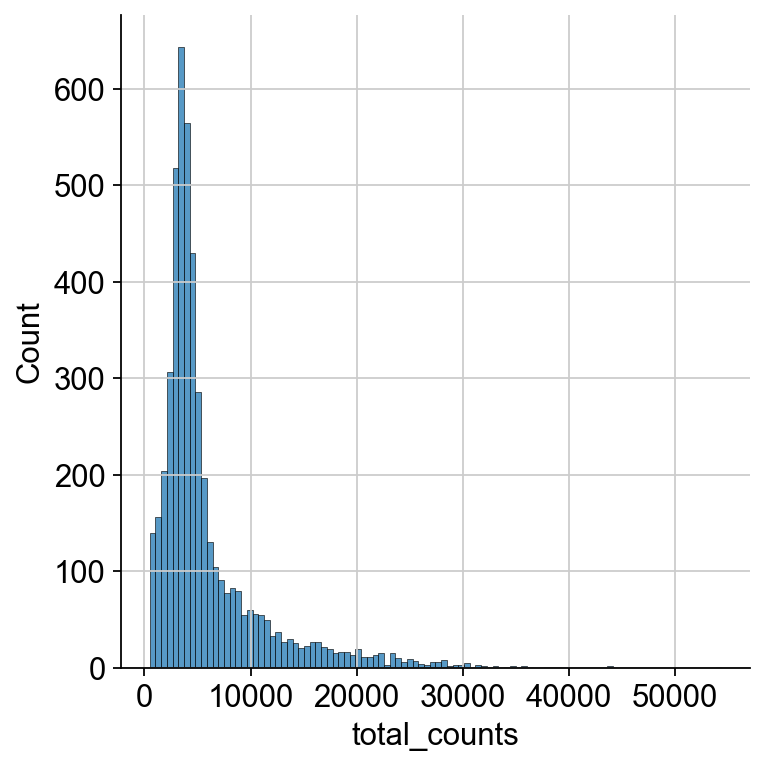

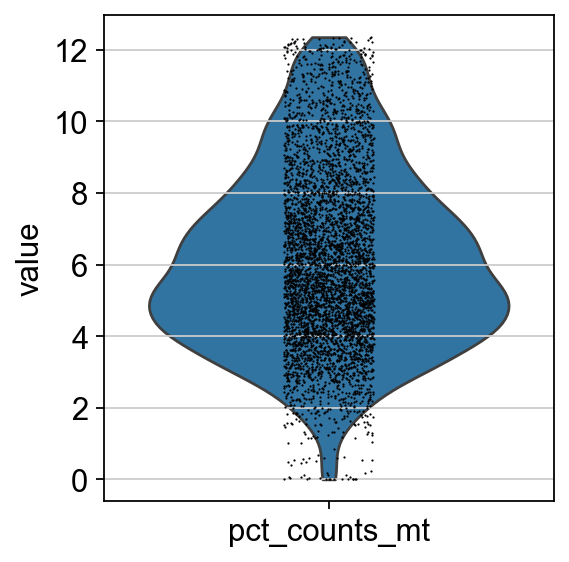

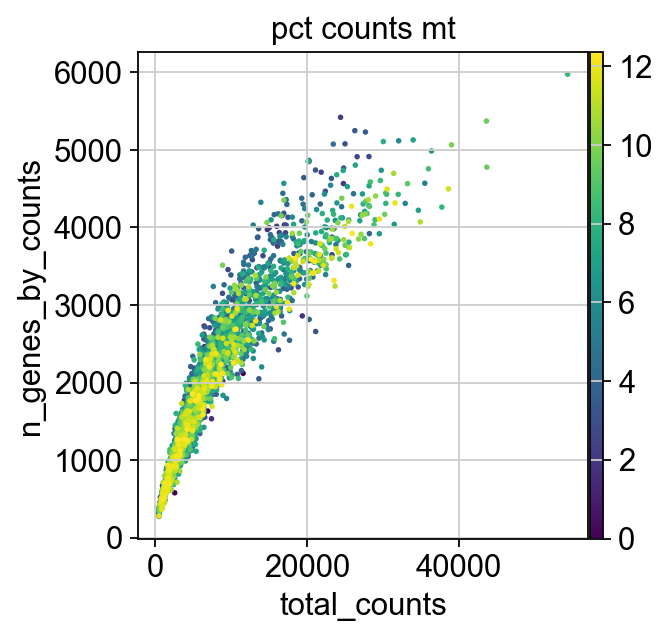

In [5]:
plot1 = sns.displot(adata_CASE.obs["total_counts"], bins=100, kde=False)
plot2 = sc.pl.violin(adata_CASE, "pct_counts_mt")
plot3 = sc.pl.scatter(adata_CASE, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [6]:
#control
adata_CON = sc.read_h5ad('CON_cleaned.h5ad')
adata_CON

AnnData object with n_obs × n_vars = 1890 × 33538
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'cells_removed'

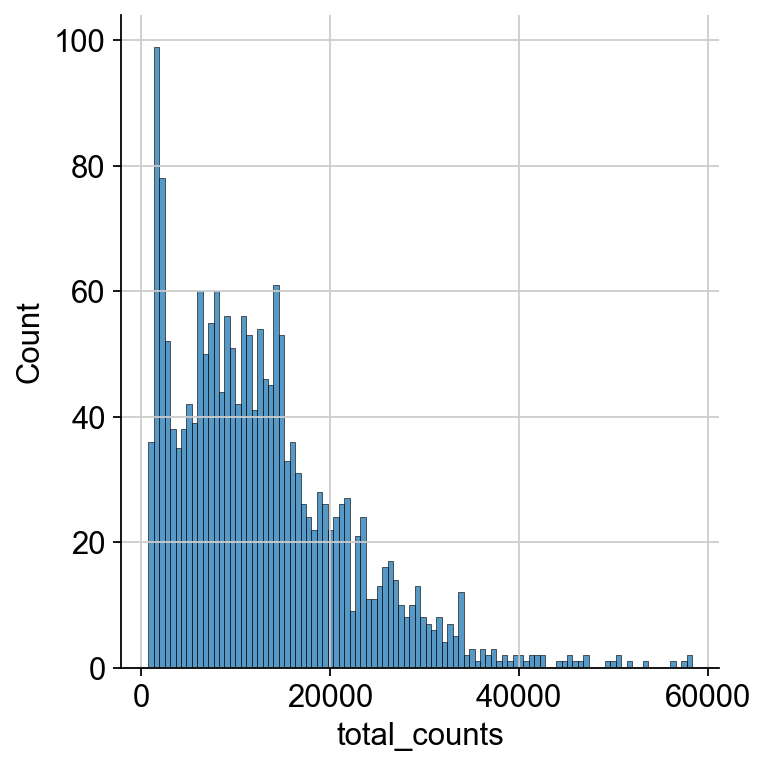

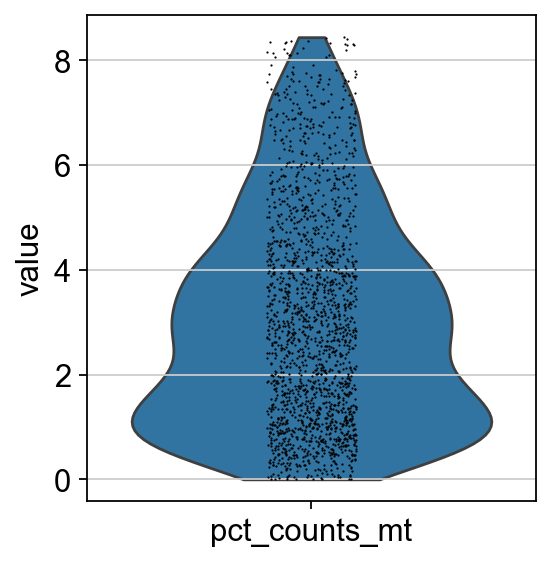

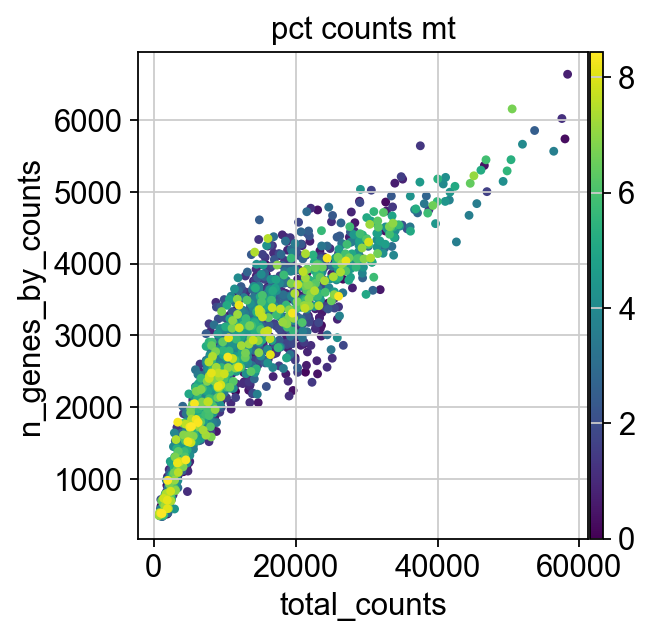

In [7]:
plot1 = sns.displot(adata_CON.obs["total_counts"], bins=100, kde=False)
plot2 = sc.pl.violin(adata_CON, "pct_counts_mt")
plot3 = sc.pl.scatter(adata_CON, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [9]:
adata_CASE.obs['sample'] = 'case'
adata_CASE.obs

n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
AAACCCAAGTGCCCGT-1               1390                 7.237778        3838.0   
AAACCCACAAGTAGTA-1               1632                 7.398174        4743.0   
AAACCCAGTTACGTAC-1               1566                 7.356918        4575.0   
AAACCCATCTATCACT-1               1114                 7.016610        3443.0   
AAACCCATCTGGGCCA-1               1663                 7.416980        5504.0   
...                               ...                      ...           ...   
TTTGGTTTCTACGGGC-1               1319                 7.185387        4149.0   
TTTGTTGAGTTTGGCT-1               3638                 8.199464       12515.0   
TTTGTTGCAGCCCACA-1               3706                 8.217978       14378.0   
TTTGTTGGTAGTCCTA-1               1390                 7.237778        3943.0   
TTTGTTGTCTCCGTGT-1               1302                 7.172425        4231.0   

                    log1p_total_counts  pct_counts_in_top_20_genes  \
AAACCCAAGTGCCCGT-1            8.252967                   28.087546   
AAACCCACAAGTAGTA-1            8.464636                   29.833439   
AAACCCAGTTACGTAC-1            8.428580                   29.224044   
AAACCCATCTATCACT-1            8.144389                   31.919837   
AAACCCATCTGGGCCA-1            8.613412                   26.235465   
...                                ...                         ...   
TTTGGTTTCTACGGGC-1            8.330864                   29.693902   
TTTGTTGAGTTTGGCT-1            9.434763                   16.803835   
TTTGTTGCAGCCCACA-1            9.573524                   24.189734   
TTTGTTGGTAGTCCTA-1            8.279951                   26.933807   
TTTGTTGTCTCCGTGT-1            8.350430                   28.645710   

                    pct_counts_mt  pct_counts_ribo  pct_counts_hb  doublet  \
AAACCCAAGTGCCCGT-1       2.813966        12.714955       0.000000    False   
AAACCCACAAGTAGTA-1       9.614168        19.734344       0.000000    False   
AAACCCAGTTACGTAC-1       3.278688        17.049179       0.021858    False   
AAACCCATCTATCACT-1       5.198955        32.645950       0.029044    False   
AAACCCATCTGGGCCA-1       5.032704        26.017443       0.000000    False   
...                           ...              ...            ...      ...   
TTTGGTTTCTACGGGC-1       3.398409        27.452396       0.000000    False   
TTTGTTGAGTTTGGCT-1       3.196165        15.908909       0.000000    False   
TTTGTTGCAGCCCACA-1       7.622757        14.278759       0.013910    False   
TTTGTTGGTAGTCCTA-1       7.785950        29.596754       0.000000    False   
TTTGTTGTCTCCGTGT-1       7.279603        22.642401       0.047270    False   

                   sample  
AAACCCAAGTGCCCGT-1   case  
AAACCCACAAGTAGTA-1   case  
AAACCCAGTTACGTAC-1   case  
AAACCCATCTATCACT-1   case  
AAACCCATCTGGGCCA-1   case  
...                   ...  
TTTGGTTTCTACGGGC-1   case  
TTTGTTGAGTTTGGCT-1   case  
TTTGTTGCAGCCCACA-1   case  
TTTGTTGGTAGTCCTA-1   case  
TTTGTTGTCTCCGTGT-1   case  

[4809 rows x 10 columns]

In [10]:
adata_CON.obs['sample'] = 'control'
adata_CON.obs

n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
AAACCCAAGGCGTTAG-1               1336                 7.198184        4017.0   
AAACCCATCAGTGTGT-1               2648                 7.881937       11532.0   
AAACGAATCGCAGTGC-1               2378                 7.774436        7435.0   
AAACGCTAGCTGGCCT-1               1561                 7.353722        6618.0   
AAACGCTCAACAGCCC-1               3066                 8.028455       14769.0   
...                               ...                      ...           ...   
TTTGGTTGTTACGTAC-1               2464                 7.809947       23097.0   
TTTGTTGGTCTAGTGT-1               3420                 8.137688       10317.0   
TTTGTTGGTGATTGGG-1               3096                 8.038189        9381.0   
TTTGTTGGTGGATTTC-1               3985                 8.290544       22995.0   
TTTGTTGTCCTCACCA-1               3013                 8.011023       15312.0   

                    log1p_total_counts  pct_counts_in_top_20_genes  \
AAACCCAAGGCGTTAG-1            8.298539                   20.786657   
AAACCCATCAGTGTGT-1            9.352968                   17.525147   
AAACGAATCGCAGTGC-1            8.914088                   16.005380   
AAACGCTAGCTGGCCT-1            8.797700                   27.394983   
AAACGCTCAACAGCCC-1            9.600353                   19.094048   
...                                ...                         ...   
TTTGGTTGTTACGTAC-1           10.047502                   30.800537   
TTTGTTGGTCTAGTGT-1            9.241645                   18.067268   
TTTGTTGGTGATTGGG-1            9.146548                   17.759301   
TTTGTTGGTGGATTTC-1           10.043076                   19.830398   
TTTGTTGTCCTCACCA-1            9.636457                   20.343521   

                    pct_counts_mt  pct_counts_ribo  pct_counts_hb  doublet  \
AAACCCAAGGCGTTAG-1       4.779686        21.906897       0.000000    False   
AAACCCATCAGTGTGT-1       0.294832        25.884495       0.017343    False   
AAACGAATCGCAGTGC-1       2.945528        21.600538       0.094149    False   
AAACGCTAGCTGGCCT-1       4.653974        38.818375       0.000000    False   
AAACGCTCAACAGCCC-1       3.155257        24.889973       0.000000    False   
...                           ...              ...            ...      ...   
TTTGGTTGTTACGTAC-1       0.428627        29.774431       0.069273    False   
TTTGTTGGTCTAGTGT-1       5.137152         9.179025       0.000000    False   
TTTGTTGGTGATTGGG-1       4.018761        13.879117       0.000000    False   
TTTGTTGGTGGATTTC-1       6.236138        23.787781       0.065232    False   
TTTGTTGTCCTCACCA-1       3.200104        19.840647       0.000000    False   

                     sample  
AAACCCAAGGCGTTAG-1  control  
AAACCCATCAGTGTGT-1  control  
AAACGAATCGCAGTGC-1  control  
AAACGCTAGCTGGCCT-1  control  
AAACGCTCAACAGCCC-1  control  
...                     ...  
TTTGGTTGTTACGTAC-1  control  
TTTGTTGGTCTAGTGT-1  control  
TTTGTTGGTGATTGGG-1  control  
TTTGTTGGTGGATTTC-1  control  
TTTGTTGTCCTCACCA-1  control  

[1890 rows x 10 columns]

In [12]:
adata = sc.concat([adata_CASE, adata_CON])

/Applications/anaconda3/envs/SCanalysis/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [13]:
adata

AnnData object with n_obs × n_vars = 6699 × 33538
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet', 'sample'

In [14]:
adata.obs_names_make_unique()

In [15]:
adata

AnnData object with n_obs × n_vars = 6699 × 33538
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet', 'sample'

In [16]:
#save combine data
adata.write_h5ad('combined.h5ad')

## 2. Data annotation using Celltypist

In [32]:
import celltypist
from celltypist import models

In [6]:
#models.get_all_models()
#Adult_Human_Skin.pkl
models.download_models(
    force_update=True, model=["Immune_All_Low.pkl", "Adult_Human_Skin.pkl"]
)

📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 50
📂 Storing models in /Users/chiranan/.celltypist/data/models
💾 Total models to download: 2
💾 Downloading model [1/2]: Immune_All_Low.pkl
💾 Downloading model [2/2]: Adult_Human_Skin.pkl


In [11]:
models.models_path

'/Users/chiranan/.celltypist/data/models'

In [27]:
model_skin = models.Model.load(model = 'Adult_Human_Skin.pkl')

In [28]:
model_skin.cell_types

array(['DC1', 'DC2', 'Differentiated_KC', 'F1', 'F2', 'F3', 'ILC1_3',
       'ILC1_NK', 'ILC2', 'Inf_mac', 'LC', 'LE1', 'LE2', 'Macro_1',
       'Macro_2', 'Mast_cell', 'Melanocyte', 'MigDC', 'Mono_mac', 'NK',
       'Pericyte_1', 'Pericyte_2', 'Plasma', 'Schwann_1', 'Schwann_2',
       'Tc', 'Th', 'Treg', 'Undifferentiated_KC', 'VE1', 'VE2', 'VE3',
       'migLC', 'moDC'], dtype=object)

In [13]:
adata = sc.read_h5ad('combined.h5ad')

In [14]:
#make copy of adata
adata_celltypist = adata.copy()

In [22]:
sc.pp.normalize_total(adata_celltypist, target_sum=1e4) ## normalize to 10,000 counts per cell
sc.pp.log1p(adata_celltypist)

In [25]:
adata_celltypist.X = adata_celltypist.X.toarray()

In [33]:
predictions = celltypist.annotate(adata_celltypist, model = model_skin, majority_voting = False)

🔬 Input data has 6699 cells and 33538 genes
🔗 Matching reference genes in the model
🧬 3295 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


In [34]:
predictions.predicted_labels

predicted_labels
AAACCCAAGTGCCCGT-1                   Th
AAACCCACAAGTAGTA-1                   Tc
AAACCCAGTTACGTAC-1                 Treg
AAACCCATCTATCACT-1                   Th
AAACCCATCTGGGCCA-1                   Th
...                                 ...
TTTGGTTGTTACGTAC-1                  DC1
TTTGTTGGTCTAGTGT-1                   F2
TTTGTTGGTGATTGGG-1                   F2
TTTGTTGGTGGATTTC-1  Undifferentiated_KC
TTTGTTGTCCTCACCA-1                  DC2

[6699 rows x 1 columns]

In [35]:
#Get an `AnnData` with predicted labels embedded into the cell metadata columns.

predictions_adata = predictions.to_adata()

In [46]:
predictions_adata.obs

n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
AAACCCAAGTGCCCGT-1               1390                 7.237778        3838.0   
AAACCCACAAGTAGTA-1               1632                 7.398174        4743.0   
AAACCCAGTTACGTAC-1               1566                 7.356918        4575.0   
AAACCCATCTATCACT-1               1114                 7.016610        3443.0   
AAACCCATCTGGGCCA-1               1663                 7.416980        5504.0   
...                               ...                      ...           ...   
TTTGGTTGTTACGTAC-1               2464                 7.809947       23097.0   
TTTGTTGGTCTAGTGT-1               3420                 8.137688       10317.0   
TTTGTTGGTGATTGGG-1               3096                 8.038189        9381.0   
TTTGTTGGTGGATTTC-1               3985                 8.290544       22995.0   
TTTGTTGTCCTCACCA-1               3013                 8.011023       15312.0   

                    log1p_total_counts  pct_counts_in_top_20_genes  \
AAACCCAAGTGCCCGT-1            8.252967                   28.087546   
AAACCCACAAGTAGTA-1            8.464636                   29.833439   
AAACCCAGTTACGTAC-1            8.428580                   29.224044   
AAACCCATCTATCACT-1            8.144389                   31.919837   
AAACCCATCTGGGCCA-1            8.613412                   26.235465   
...                                ...                         ...   
TTTGGTTGTTACGTAC-1           10.047502                   30.800537   
TTTGTTGGTCTAGTGT-1            9.241645                   18.067268   
TTTGTTGGTGATTGGG-1            9.146548                   17.759301   
TTTGTTGGTGGATTTC-1           10.043076                   19.830398   
TTTGTTGTCCTCACCA-1            9.636457                   20.343521   

                    pct_counts_mt  pct_counts_ribo  pct_counts_hb  doublet  \
AAACCCAAGTGCCCGT-1       2.813966        12.714955       0.000000    False   
AAACCCACAAGTAGTA-1       9.614168        19.734344       0.000000    False   
AAACCCAGTTACGTAC-1       3.278688        17.049179       0.021858    False   
AAACCCATCTATCACT-1       5.198955        32.645950       0.029044    False   
AAACCCATCTGGGCCA-1       5.032704        26.017443       0.000000    False   
...                           ...              ...            ...      ...   
TTTGGTTGTTACGTAC-1       0.428627        29.774431       0.069273    False   
TTTGTTGGTCTAGTGT-1       5.137152         9.179025       0.000000    False   
TTTGTTGGTGATTGGG-1       4.018761        13.879117       0.000000    False   
TTTGTTGGTGGATTTC-1       6.236138        23.787781       0.065232    False   
TTTGTTGTCCTCACCA-1       3.200104        19.840647       0.000000    False   

                     sample     predicted_labels  conf_score  
AAACCCAAGTGCCCGT-1     case                   Th    0.999785  
AAACCCACAAGTAGTA-1     case                   Tc    0.972342  
AAACCCAGTTACGTAC-1     case                 Treg    0.999616  
AAACCCATCTATCACT-1     case                   Th    0.121425  
AAACCCATCTGGGCCA-1     case                   Th    0.999897  
...                     ...                  ...         ...  
TTTGGTTGTTACGTAC-1  control                  DC1    0.999734  
TTTGTTGGTCTAGTGT-1  control                   F2    0.999987  
TTTGTTGGTGATTGGG-1  control                   F2    0.999267  
TTTGTTGGTGGATTTC-1  control  Undifferentiated_KC    0.993985  
TTTGTTGTCCTCACCA-1  control                  DC2    0.940543  

[6699 rows x 12 columns]

In [47]:
sc.pp.neighbors(predictions_adata)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [48]:
sc.tl.umap(predictions_adata)

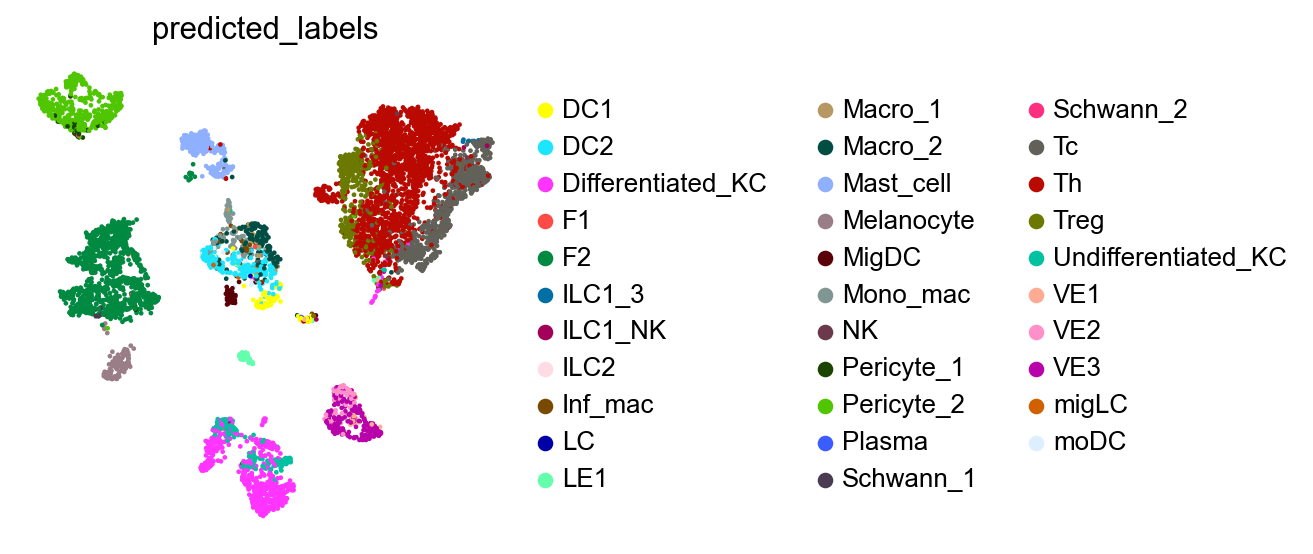

In [58]:
sc.pl.umap(predictions_adata, color = ['predicted_labels'], legend_fontsize = 'small')

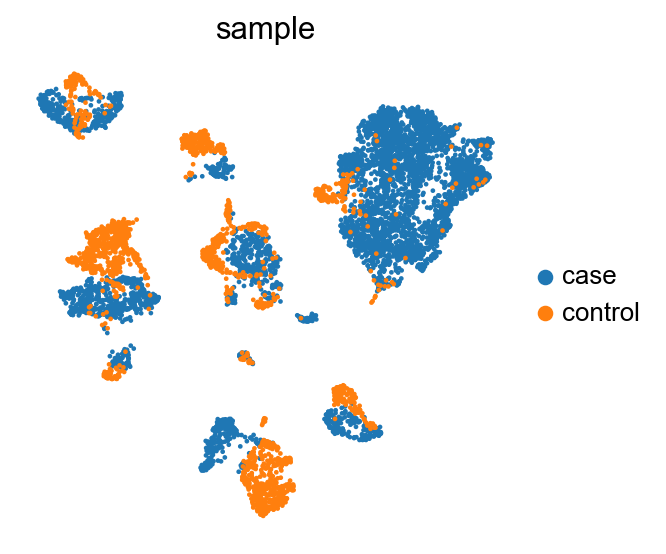

In [59]:
sc.pl.umap(predictions_adata, color = ['sample'], legend_fontsize = 'small')

In [37]:
#copy the results to our original AnnData object:
adata.obs["celltypist_skin_label"] = predictions_adata.obs.loc[adata.obs.index, "predicted_labels"]
adata.obs["celltypist_conf_score"] = predictions_adata.obs.loc[adata.obs.index, "conf_score"]

In [38]:
adata

AnnData object with n_obs × n_vars = 6699 × 33538
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet', 'sample', 'celltypist_skin_label', 'celltypist_conf_score'

In [43]:
adata.obs["celltypist_skin_label"].value_counts()

celltypist_skin_label
Th                     1952
F2                     1000
Tc                      723
Differentiated_KC       524
Pericyte_2              432
Treg                    399
Mast_cell               247
VE3                     226
DC2                     218
Undifferentiated_KC     165
Macro_2                 143
Melanocyte              122
Mono_mac                105
DC1                      98
VE2                      71
LE1                      57
MigDC                    46
Macro_1                  29
VE1                      27
Pericyte_1               24
moDC                     24
Inf_mac                  17
Schwann_1                 9
ILC1_NK                   7
NK                        7
ILC1_3                    6
ILC2                      6
F1                        5
migLC                     5
LC                        2
Schwann_2                 2
Plasma                    1
Name: count, dtype: int64

In [44]:
adata.write_h5ad('unintegrate.h5ad')

## 3. Integration

In [29]:
adata = sc.read_h5ad('unintegrate.h5ad')
adata

AnnData object with n_obs × n_vars = 6699 × 33538
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet', 'sample', 'celltypist_skin_label', 'celltypist_conf_score'

In [30]:
adata.layers['counts'] = adata.X.copy()
adata

AnnData object with n_obs × n_vars = 6699 × 33538
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet', 'sample', 'celltypist_skin_label', 'celltypist_conf_score'
    layers: 'counts'

In [31]:
#shifted logarithm
#Normalize counts per cell
scales_counts = sc.pp.normalize_total(adata, target_sum=None, inplace=False)
# log1p transform
adata.layers["log1p_norm"] = sc.pp.log1p(scales_counts["X"], copy=True)
adata

AnnData object with n_obs × n_vars = 6699 × 33538
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet', 'sample', 'celltypist_skin_label', 'celltypist_conf_score'
    layers: 'counts', 'log1p_norm'

In [32]:
scvi.model.SCVI.setup_anndata(adata, layer = "counts",
                             categorical_covariate_keys=["sample"],
                             continuous_covariate_keys=['pct_counts_mt', 'total_counts', 'pct_counts_ribo'])

In [33]:
#initialize the model
model = scvi.model.SCVI(adata)

In [34]:
#train the model
#This will take 3 hr. I run this in google colab using GPU
#model.train()

In [ ]:
#model_scvi.view_anndata_setup()

In [ ]:
#adata.obsm['X_scVI'] = model.get_latent_representation()

In [35]:
adata = sc.read_h5ad('integrate.h5ad')
adata

AnnData object with n_obs × n_vars = 6699 × 33538
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet', 'sample', 'celltypist_skin_label', 'celltypist_conf_score', '_scvi_batch', '_scvi_labels'
    uns: '_scvi_manager_uuid', '_scvi_uuid'
    obsm: 'X_scVI', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts', 'log1p_norm'

In [36]:
adata.obsm['X_scVI'].shape

(6699, 10)

In [37]:
sc.pp.neighbors(adata, use_rep = "X_scVI")

In [38]:
sc.tl.leiden(adata, resolution = 3, key_added = 'overcluster')

In [39]:
sc.tl.umap(adata)

In [40]:
sc.pp.normalize_total(adata)

In [41]:
sc.pp.log1p(adata)

In [18]:
adata

AnnData object with n_obs × n_vars = 6699 × 33538
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet', 'sample', 'celltypist_skin_label', 'celltypist_conf_score', '_scvi_batch', '_scvi_labels', 'overcluster'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'neighbors', 'overcluster', 'umap', 'log1p'
    obsm: 'X_scVI', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs', 'X_umap'
    layers: 'counts', 'log1p_norm'
    obsp: 'distances', 'connectivities'

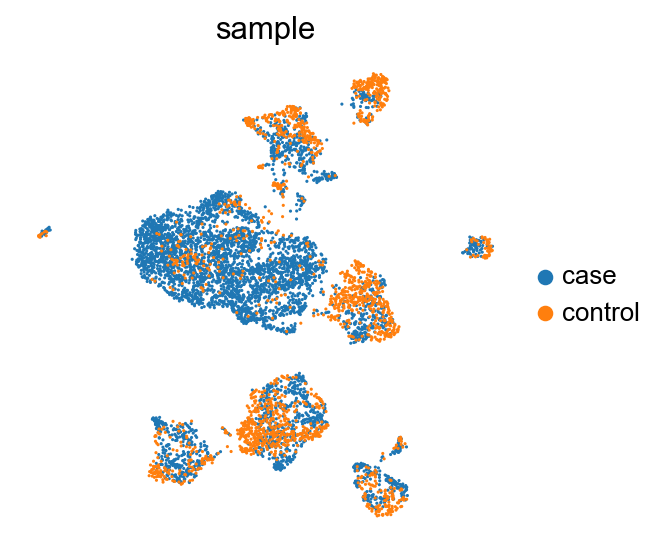

In [68]:
sc.pl.umap(adata, color = ['sample'], legend_fontsize = 'small', s = 8)

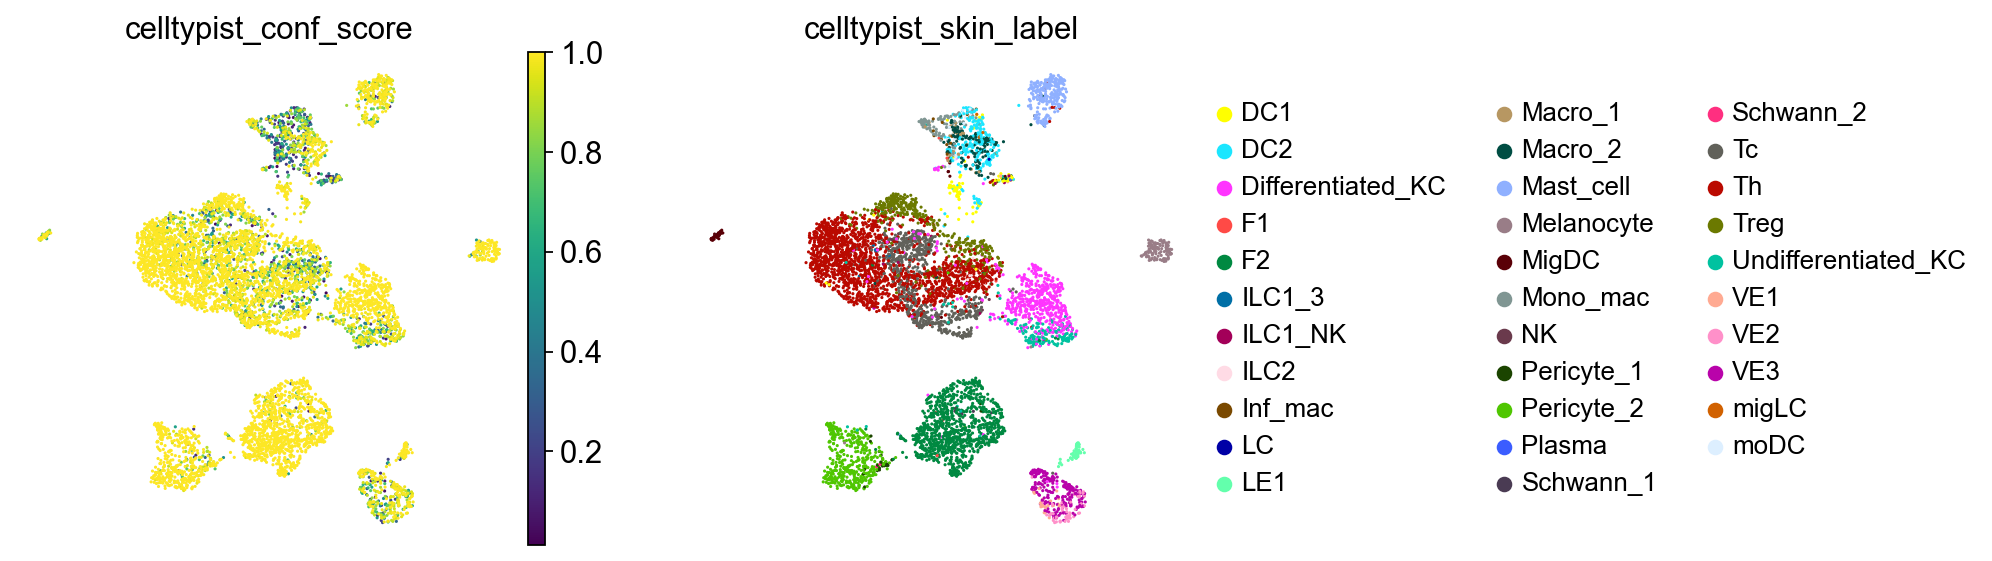

In [67]:
sc.pl.umap(adata, color = ['celltypist_conf_score', 'celltypist_skin_label'], legend_fontsize = 'small', s= 8)

In [44]:
adata.write_h5ad('temp.h5ad')

In [32]:
adata = sc.read_h5ad('temp.h5ad')

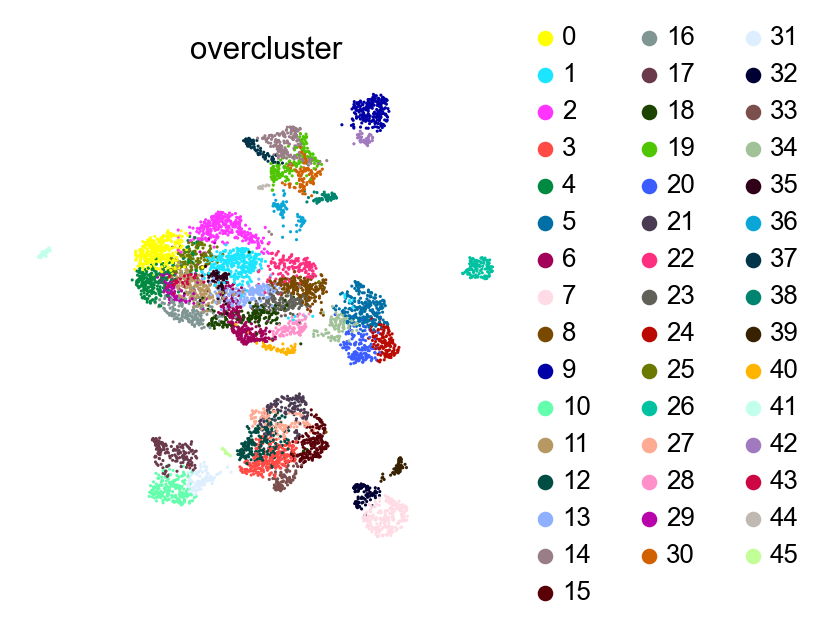

In [33]:
sc.pl.umap(adata, color = ['overcluster'], legend_fontsize = 'small', s = 8)

.transform(lambda x: x.mode()[0]): This applies a transformation to each group. Specifically, it calculates the mode (the most frequent value) of the celltypist_skin_label column for each group and assigns this mode value to every row in that group. The lambda function lambda x: x.mode()[0] returns the first mode if there are multiple modes.

In [34]:
adata.obs['celltypist_skin_major'] = adata.obs.groupby('overcluster')['celltypist_skin_label'].transform(lambda x: x.mode()[0])

In [35]:
adata.obs['celltypist_skin_major']

AAACCCAAGTGCCCGT-1                   Th
AAACCCACAAGTAGTA-1                   Tc
AAACCCAGTTACGTAC-1                 Treg
AAACCCATCTATCACT-1                   Th
AAACCCATCTGGGCCA-1                   Th
                            ...        
TTTGGTTGTTACGTAC-1                  DC1
TTTGTTGGTCTAGTGT-1                   F2
TTTGTTGGTGATTGGG-1                   F2
TTTGTTGGTGGATTTC-1    Differentiated_KC
TTTGTTGTCCTCACCA-1                  DC2
Name: celltypist_skin_major, Length: 6699, dtype: object

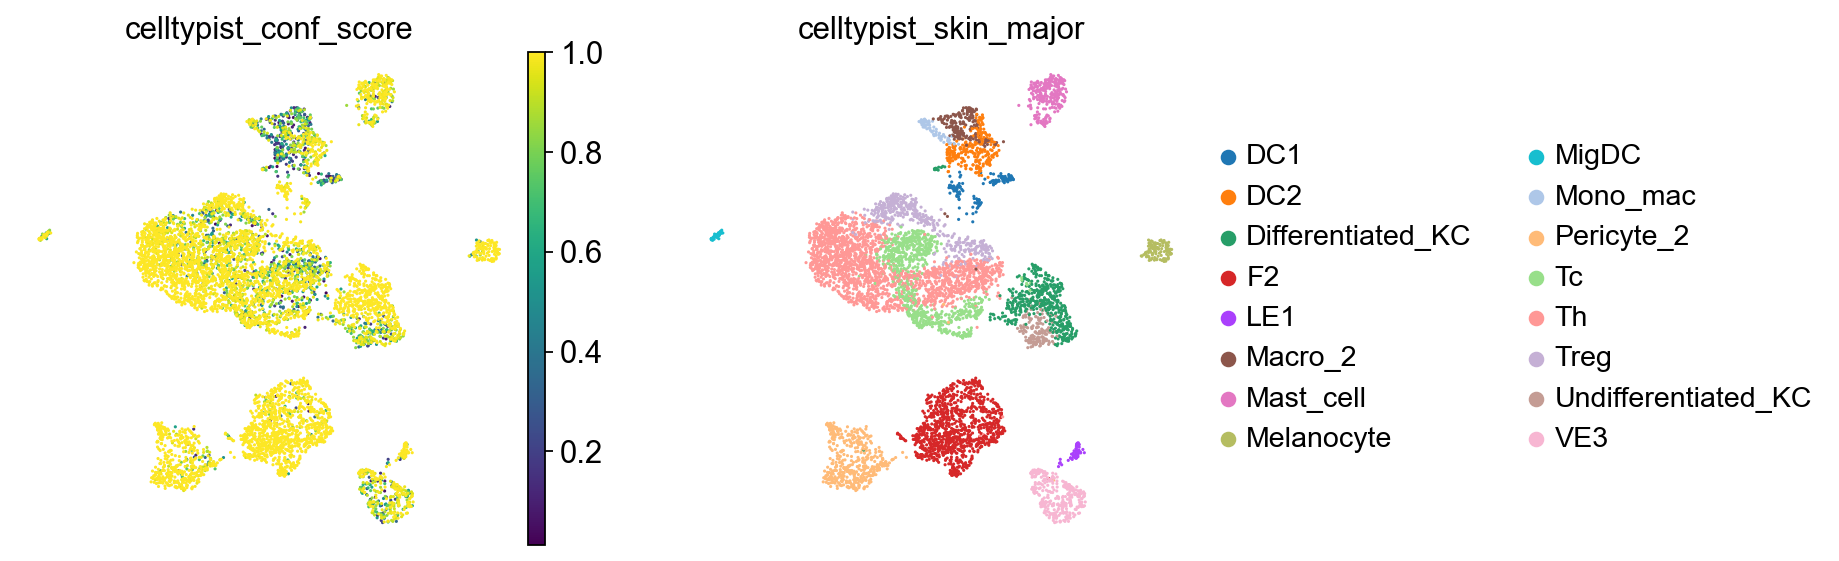

In [36]:
sc.pl.umap(adata, color = ['celltypist_conf_score','celltypist_skin_major'], s = 8)

**KEEP IN MIND** The reference database for annotation is super important. Make sure that the cell types in reference database are in our dataset. The confident score could be high even the cell type are lebelled incorrectly. So, we need to verfy these cluster

## 4. Manual annotation

In [37]:
labels = adata.obs[['celltypist_skin_label', 'overcluster']].groupby('overcluster').agg(lambda x: x.mode())
scores = adata.obs[['celltypist_conf_score', 'overcluster']].groupby('overcluster').agg(lambda x: x.mean())

mapping_res = labels.merge(right = scores, left_index=True, right_index=True)

In [81]:
#a summary of the predominant cell type 
mapping_res[(mapping_res.celltypist_skin_label) == 'Th']

celltypist_skin_label  celltypist_conf_score
overcluster                                             
0                              Th               0.935946
4                              Th               0.970288
8                              Th               0.721842
11                             Th               0.950702
13                             Th               0.875864
16                             Th               0.986300
18                             Th               0.863738
23                             Th               0.942142
25                             Th               0.889806
29                             Th               0.958552
43                             Th               0.970700

In [156]:
mapping_res[(mapping_res.index == '37')]

celltypist_skin_label  celltypist_conf_score
overcluster                                             
37                       Mono_mac               0.602525

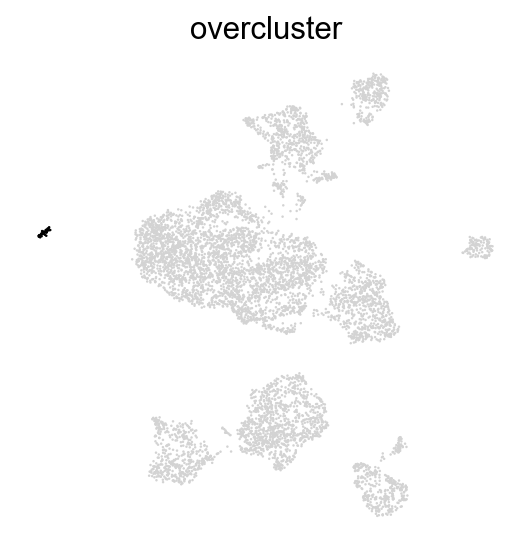

In [161]:
ax = sc.pl.umap(adata, palette = 'lightgray', show = False, s=5)
sc.pl.umap(adata[adata.obs.overcluster == '41'], color = 'overcluster', palette = 'k', ax = ax, legend_loc = None, s = 5)

In [14]:
#for x in range(len(adata.obs.overcluster.unique())):
    #print(f'"{x}": " ",')

In [42]:
sc.tl.rank_genes_groups(adata, groupby='overcluster')

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [43]:
markers = sc.get.rank_genes_groups_df(adata, group=None)
markers

group  names      scores  logfoldchanges          pvals      pvals_adj
0           0   SRGN   56.248749        3.765032  9.377066e-222  1.084441e-218
1           0  PTPRC   43.070160        2.567027  2.104535e-170  9.538096e-168
2           0  SARAF   42.888657        2.596008  3.534859e-152  1.087634e-149
3           0  TXNIP   42.064316        3.138587  2.242552e-152  6.963955e-150
4           0   STK4   40.829277        2.549002  7.895506e-149  2.343358e-146
...       ...    ...         ...             ...            ...            ...
1542743    45  EIF5B  -72.429749      -29.286308   0.000000e+00   0.000000e+00
1542744    45  ROCK1  -72.688477      -29.131769   0.000000e+00   0.000000e+00
1542745    45  EIF3G  -80.817360      -29.152327   0.000000e+00   0.000000e+00
1542746    45  SYNE2  -81.926186      -30.003319   0.000000e+00   0.000000e+00
1542747    45  SRSF7 -106.797844      -30.802244   0.000000e+00   0.000000e+00

[1542748 rows x 6 columns]

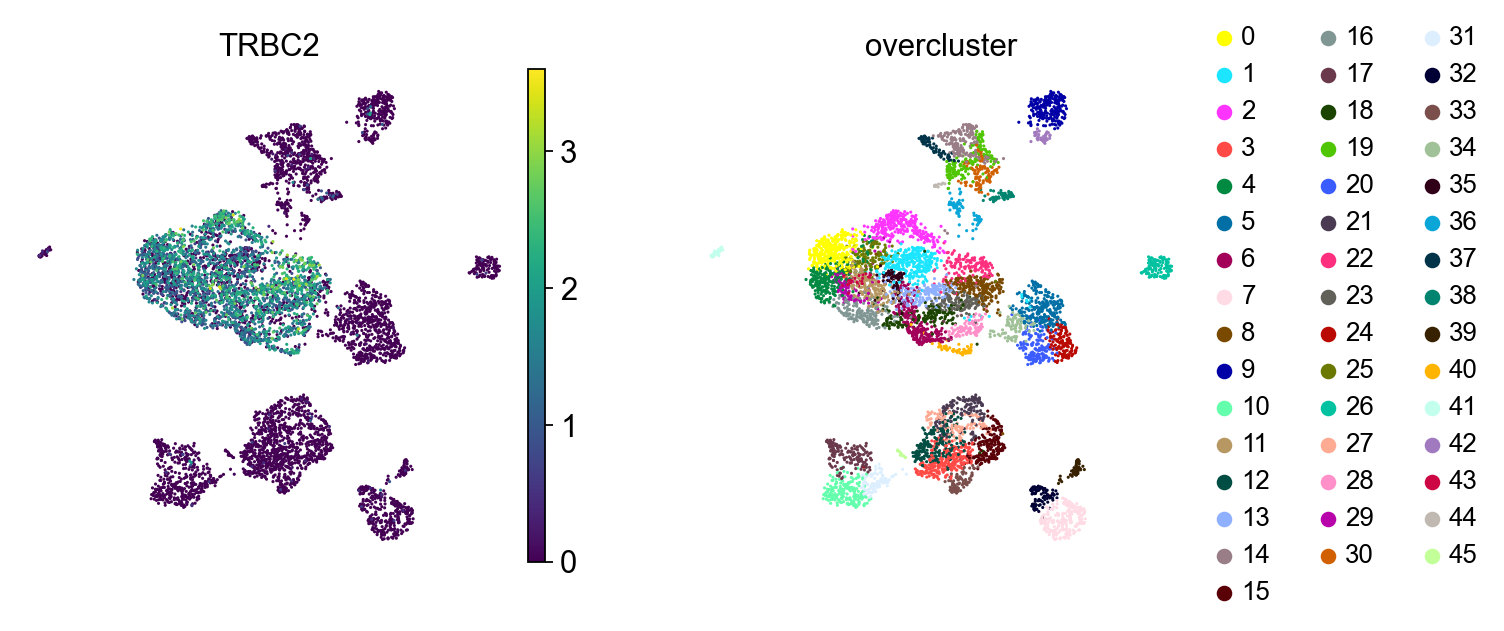

In [44]:
#marker for all T cells
sc.pl.umap(adata, color = ['TRBC2', 'overcluster'], legend_fontsize = 'small', s = 8)

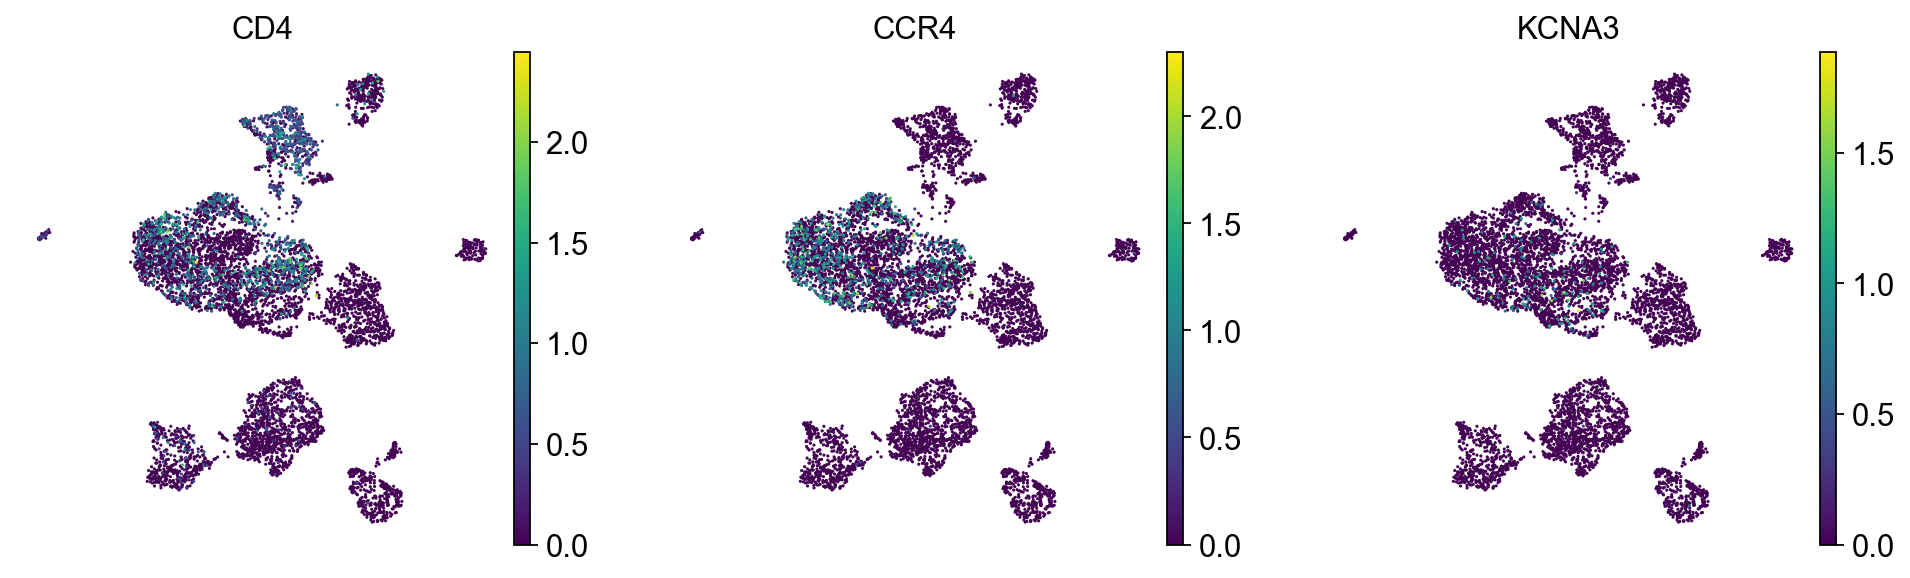

In [110]:
#Th => label as CD4Tc
sc.pl.umap(adata, color = ['CD4', 'CCR4', 'KCNA3'], legend_fontsize = 'small', s = 8)

In [166]:
markers[(markers.group == '29') & (markers.pvals_adj < 0.05)].sort_values('logfoldchanges', ascending=False).head(10)

group       names     scores  logfoldchanges         pvals  \
972913    29       USP35   2.624351        2.945420  9.996792e-03   
972606    29     TSC22D3  14.714232        2.643064  1.945706e-27   
972604    29       CXCR4  16.422934        2.570487  2.587904e-31   
972736    29  AC008549.2   4.184350        2.538086  6.008166e-05   
972602    29     ZFP36L2  18.263075        2.498991  5.569486e-35   
972605    29       TXNIP  15.360368        2.479321  5.475714e-29   
972943    29  AC009133.1   2.457571        2.474566  1.565020e-02   
972610    29     ZC3HAV1  12.035699        2.468204  1.779753e-21   
972789    29       SCRG1   3.510647        2.376775  6.633947e-04   
972607    29        SRGN  14.506663        2.354862  2.146008e-27   

           pvals_adj  
972913  3.182160e-02  
972606  3.079522e-26  
972604  4.681399e-30  
972736  2.802530e-04  
972602  1.141047e-33  
972605  9.209854e-28  
972943  4.758627e-02  
972610  2.290459e-20  
972789  2.671261e-03  
972607  3.390146e-26

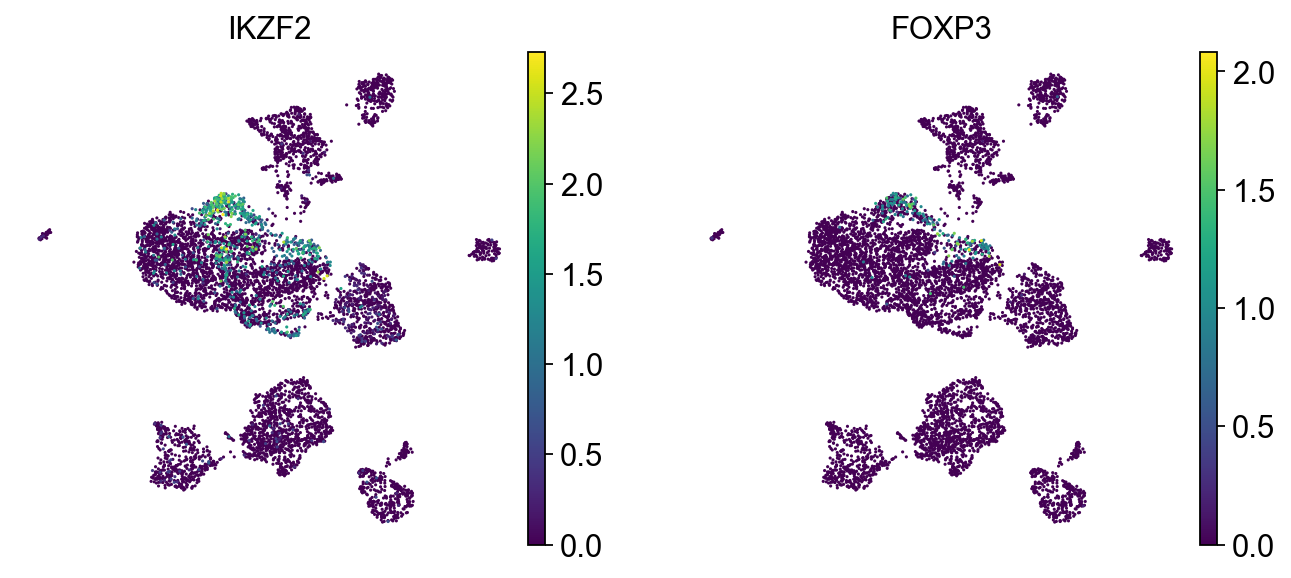

In [46]:
#Treg
sc.pl.umap(adata, color = ['IKZF2', 'FOXP3'], legend_fontsize = 'small', s = 8)

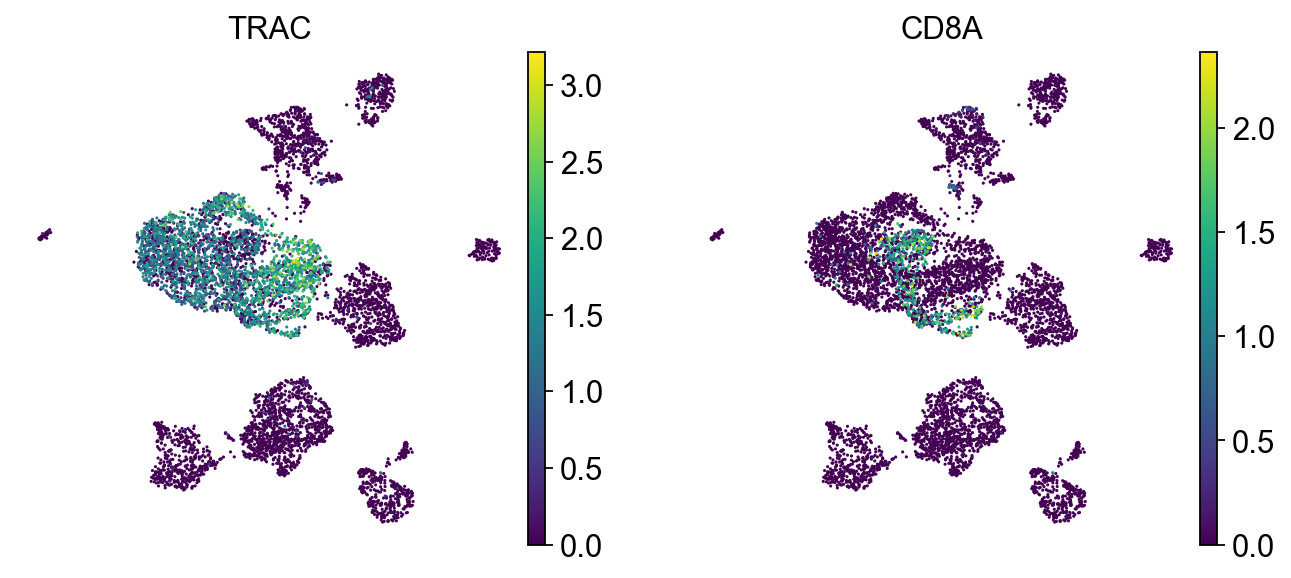

In [47]:
#Tc / cytotoxic T cell => label as CD8Tc
sc.pl.umap(adata, color = ['TRAC', 'CD8A'], legend_fontsize = 'small', s = 8)

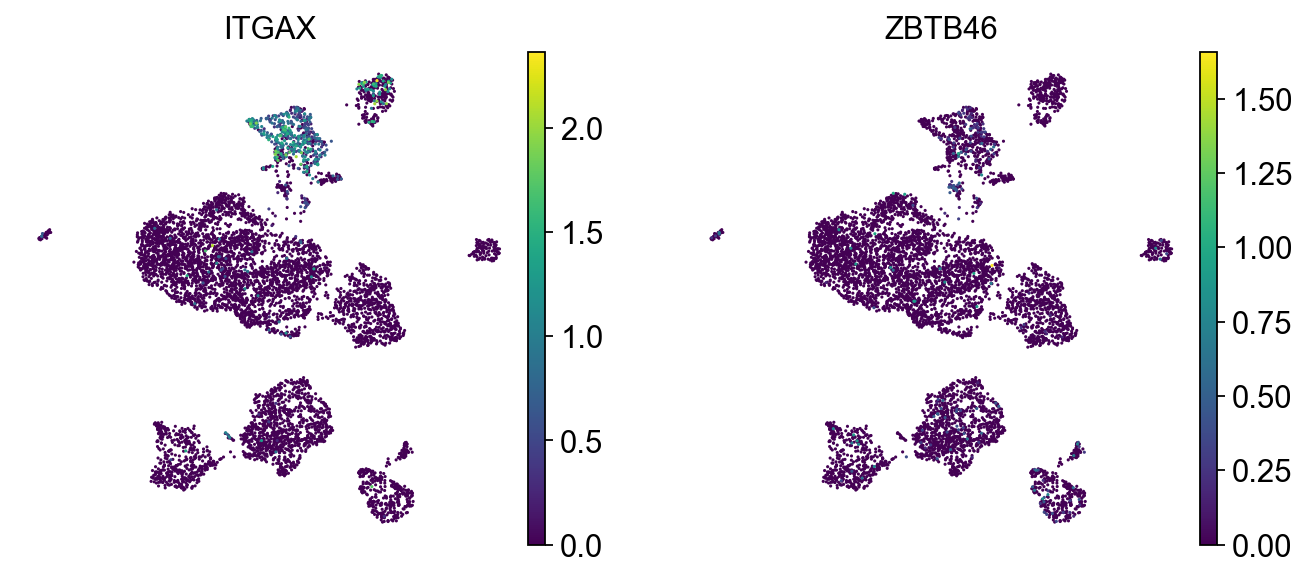

In [48]:
#DC: dendritic cell
sc.pl.umap(adata, color = ['ITGAX', 'ZBTB46'], legend_fontsize = 'small', s = 8)

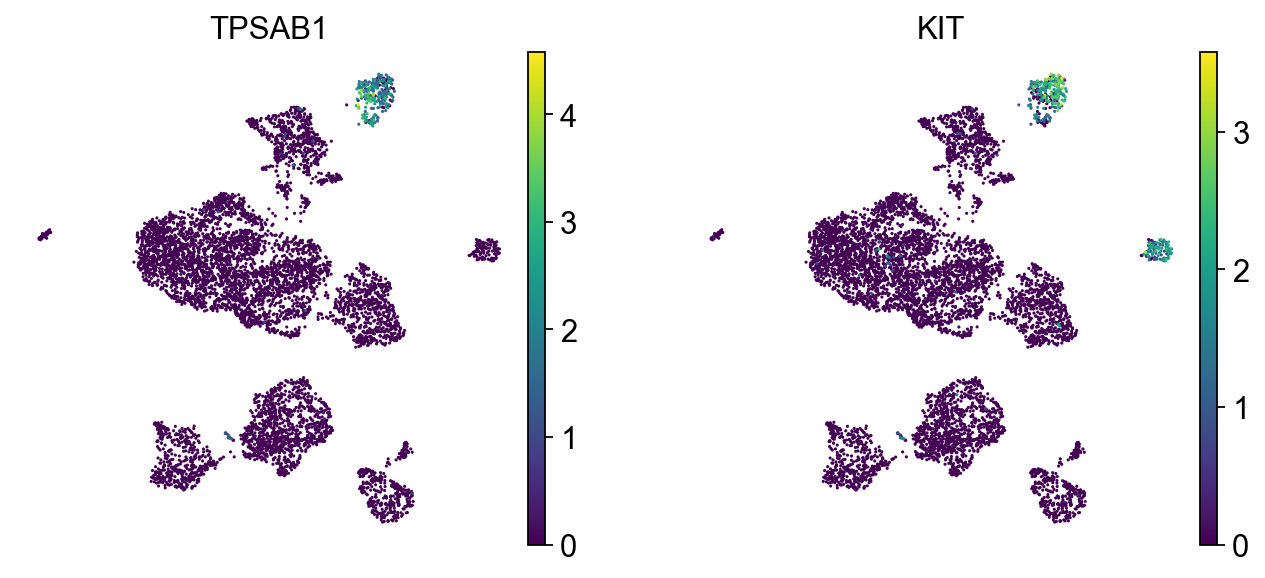

In [49]:
#mast cell
sc.pl.umap(adata, color = ['TPSAB1', 'KIT'], legend_fontsize = 'small', s = 8)

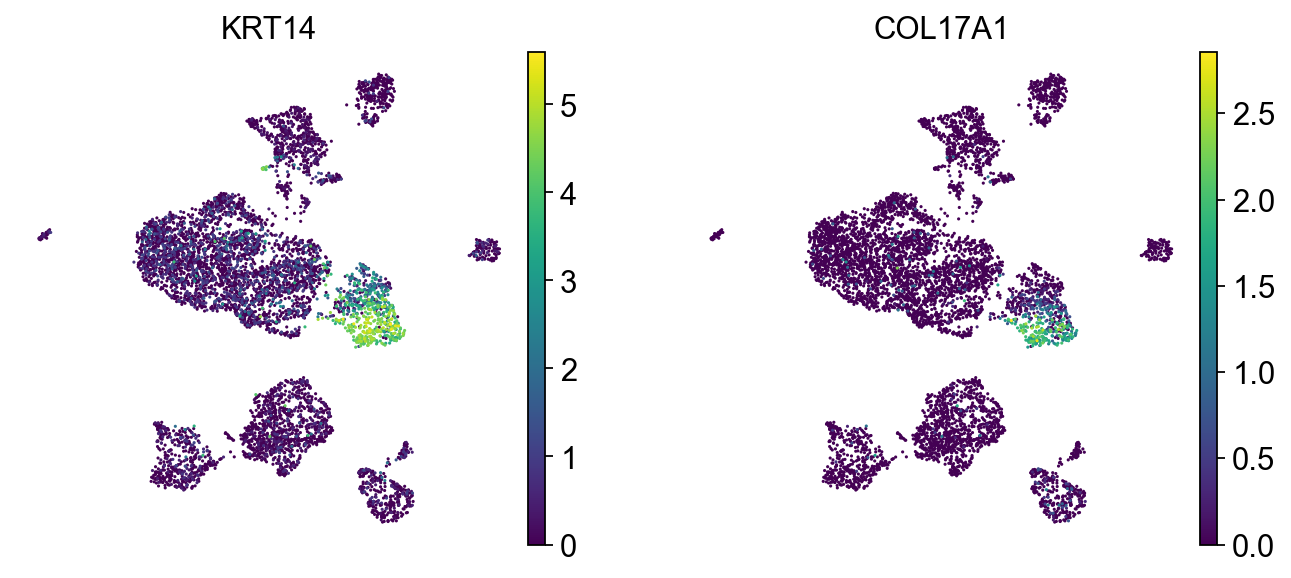

In [50]:
#keratinocyte : basal keratinocyte or undifferentiated KC
sc.pl.umap(adata, color = ['KRT14', 'COL17A1' ], legend_fontsize = 'small', s = 8)

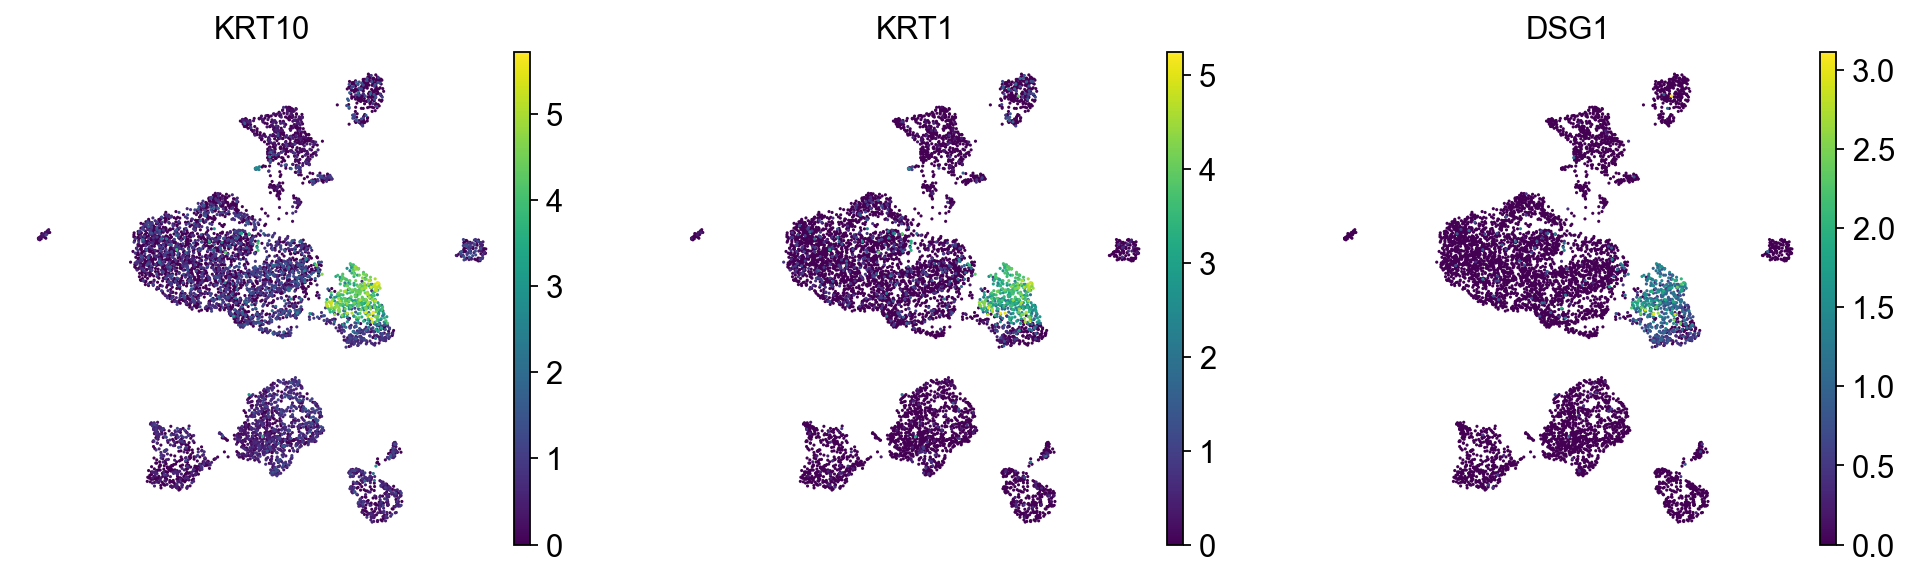

In [51]:
#keratinocyte: 
sc.pl.umap(adata, color = ['KRT10', 'KRT1', 'DSG1'], legend_fontsize = 'small', s = 8)

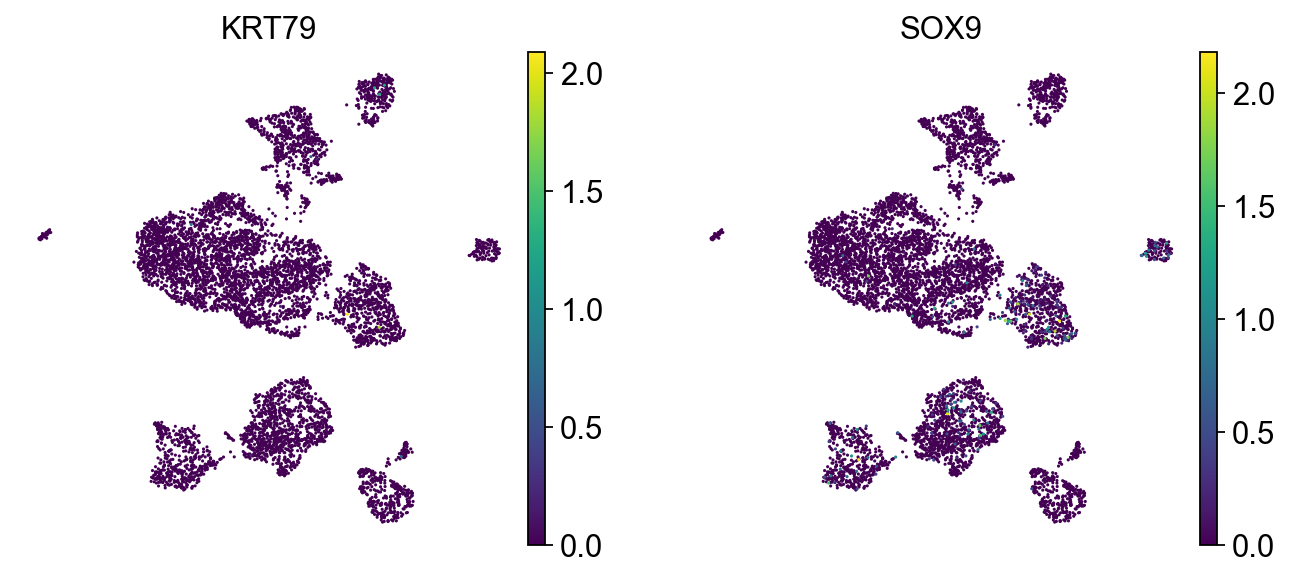

In [52]:
#keratinocyte: hair follicle keratinocyte
sc.pl.umap(adata, color = ['KRT79', 'SOX9'], legend_fontsize = 'small', s = 8)

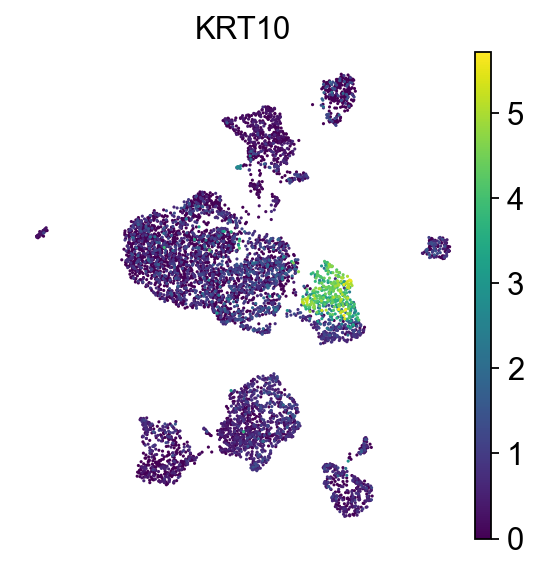

In [53]:
#keratinocyte: spinous keratinocyte
sc.pl.umap(adata, color = ['KRT10'], legend_fontsize = 'small', s = 8)

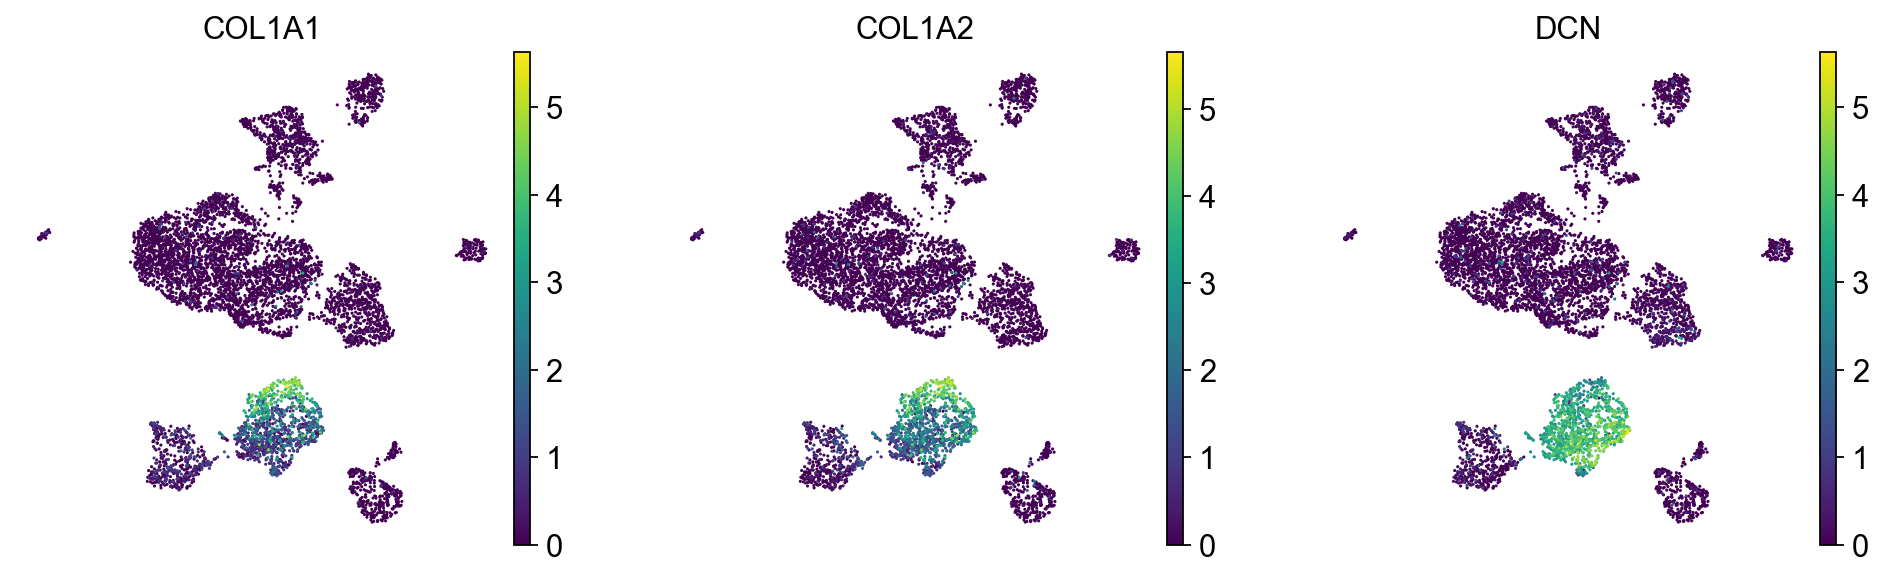

In [54]:
#dermal fibroblast
sc.pl.umap(adata, color = ['COL1A1','COL1A2', 'DCN'], legend_fontsize = 'small', s = 8)

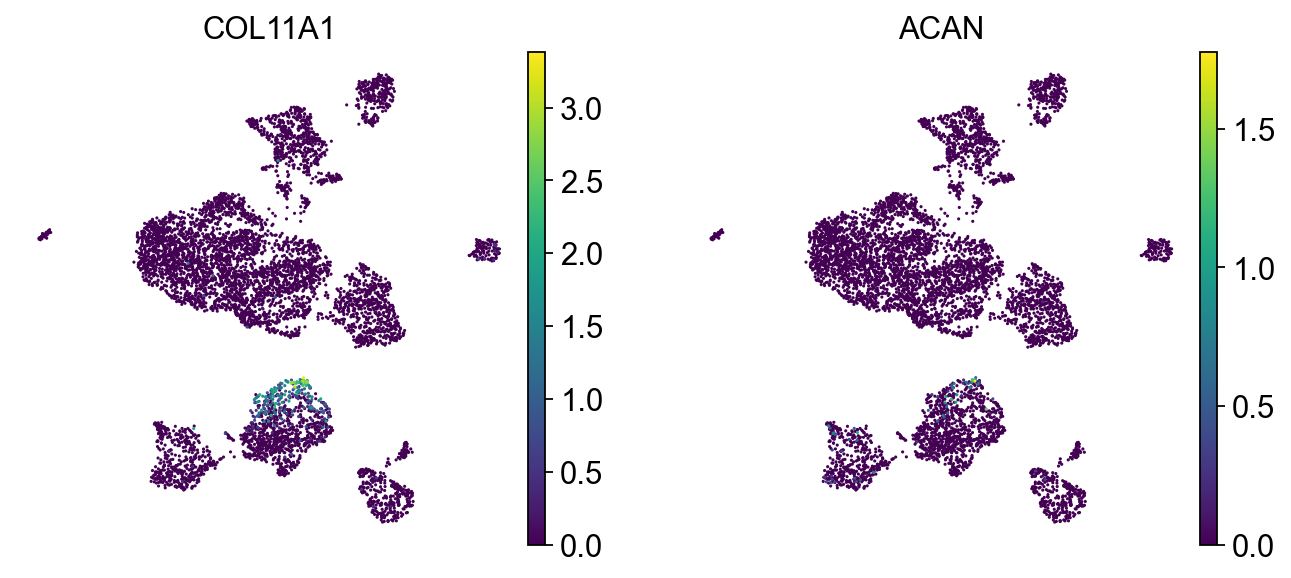

In [55]:
#dermal sheath
sc.pl.umap(adata, color = ['COL11A1', 'ACAN'], legend_fontsize = 'small', s = 8)

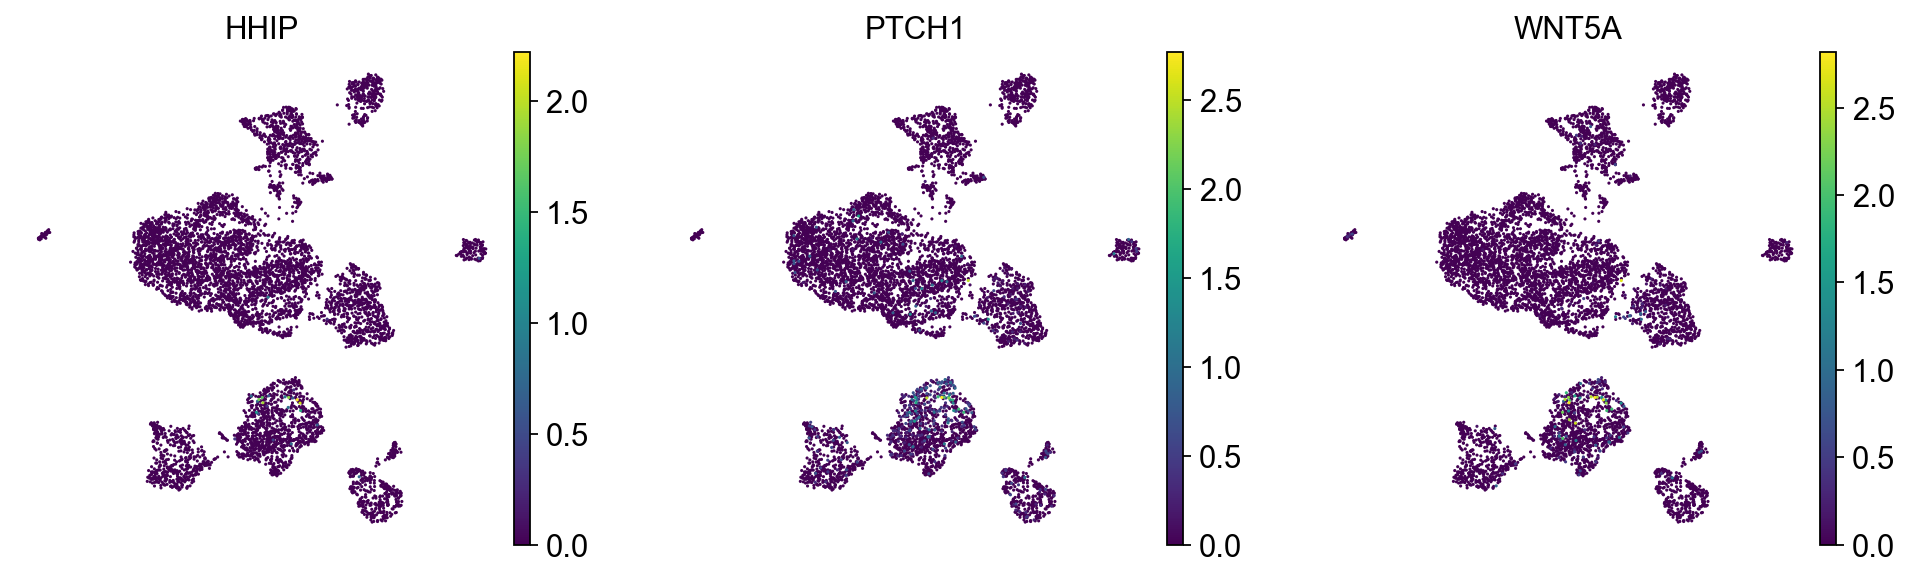

In [56]:
#HFDPC
sc.pl.umap(adata, color = ['HHIP', 'PTCH1', 'WNT5A'], legend_fontsize = 'small', s = 8)

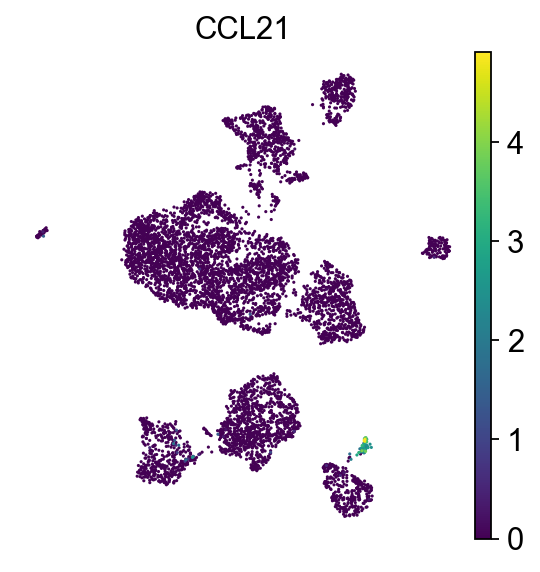

In [57]:
#lymphatic endothelium
sc.pl.umap(adata, color = ['CCL21'], legend_fontsize = 'small', s = 8)

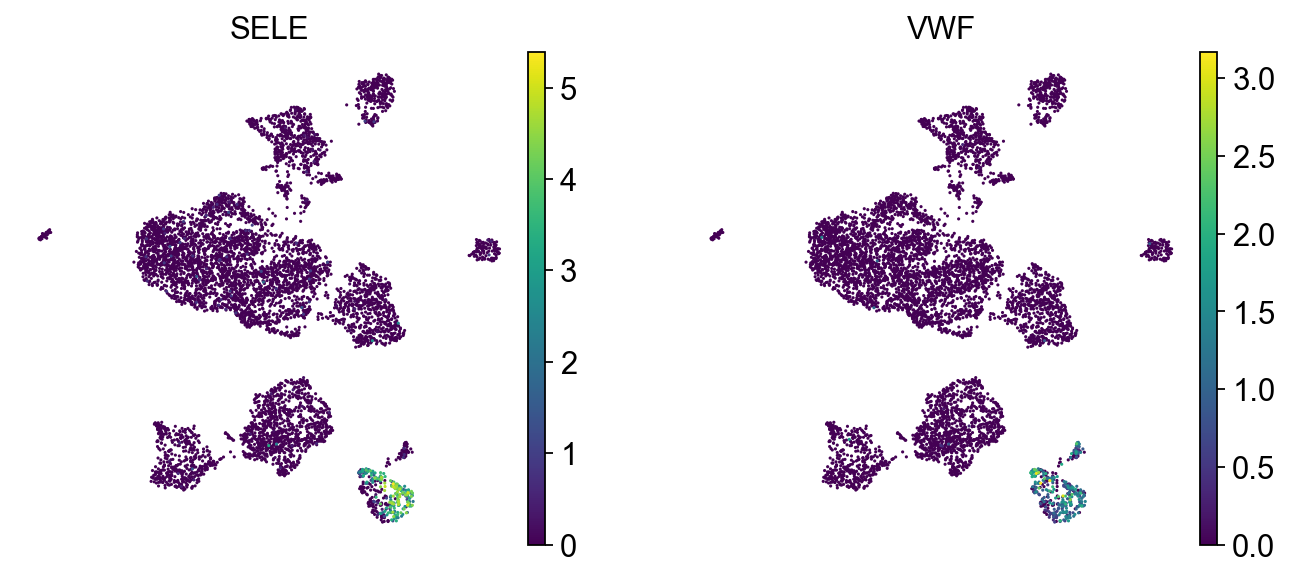

In [58]:
#vascular endothelium
sc.pl.umap(adata, color = ['SELE', 'VWF'], legend_fontsize = 'small', s = 8)

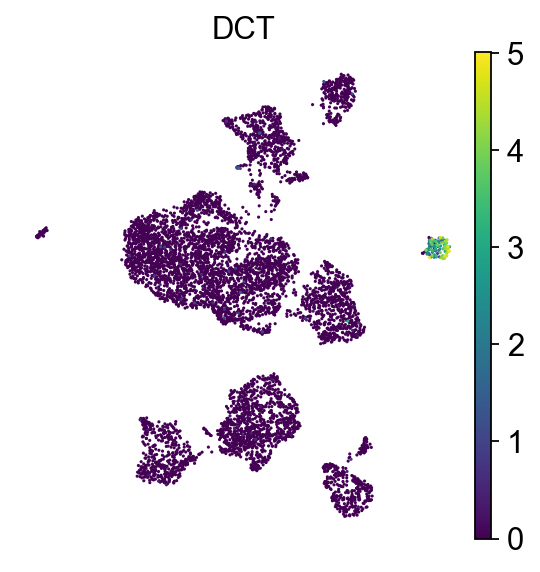

In [59]:
#melanocyte
sc.pl.umap(adata, color = ['DCT'], legend_fontsize = 'small', s = 8)

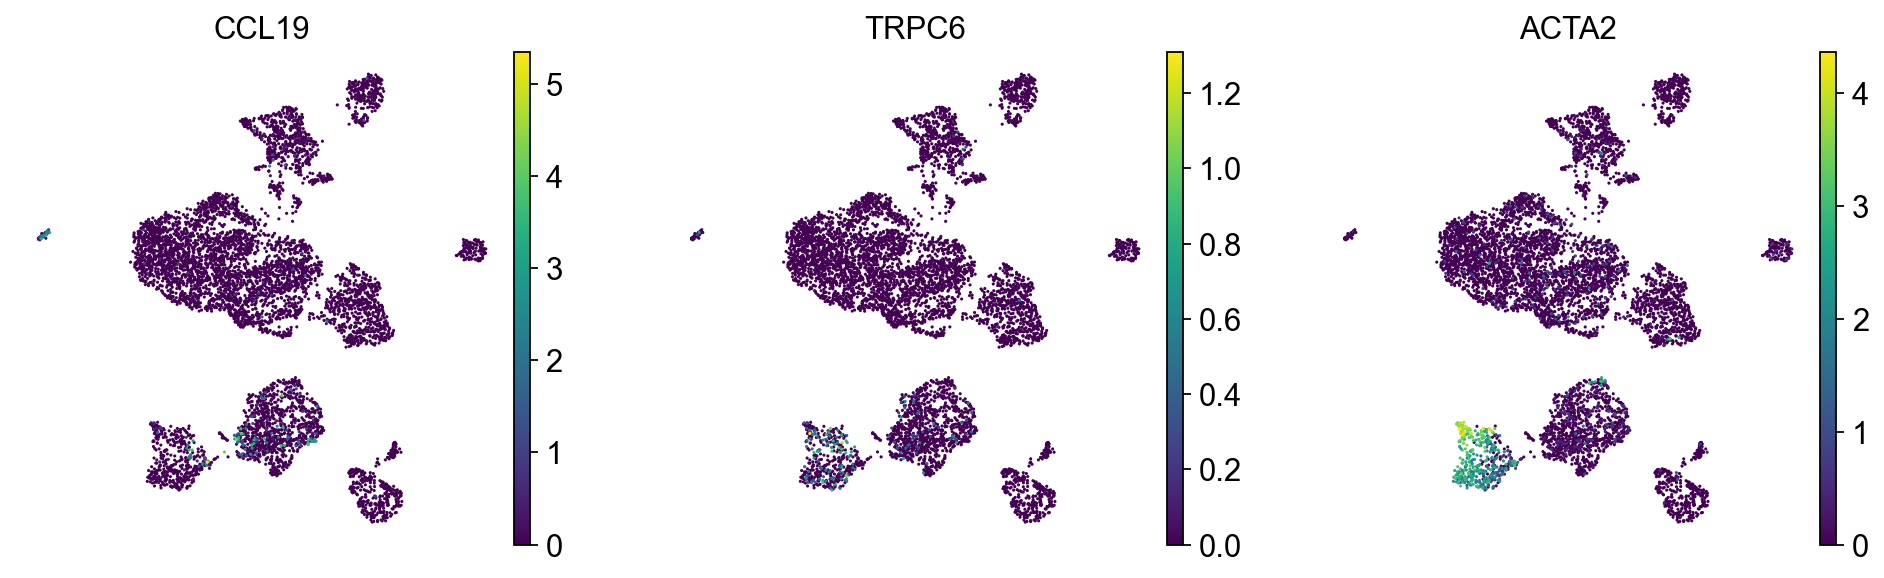

In [60]:
#Pericyte
sc.pl.umap(adata, color = ['CCL19', 'TRPC6', 'ACTA2'], legend_fontsize = 'small', s = 8)

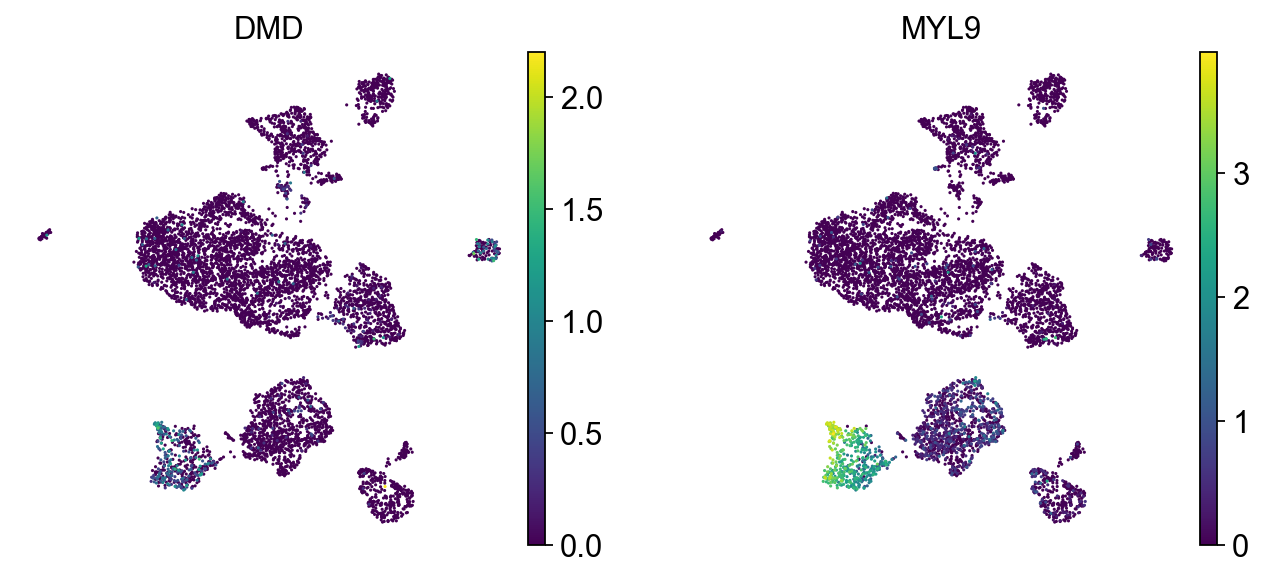

In [61]:
#muscle, myocyte
sc.pl.umap(adata, color = ['DMD', 'MYL9'], legend_fontsize = 'small', s = 8)

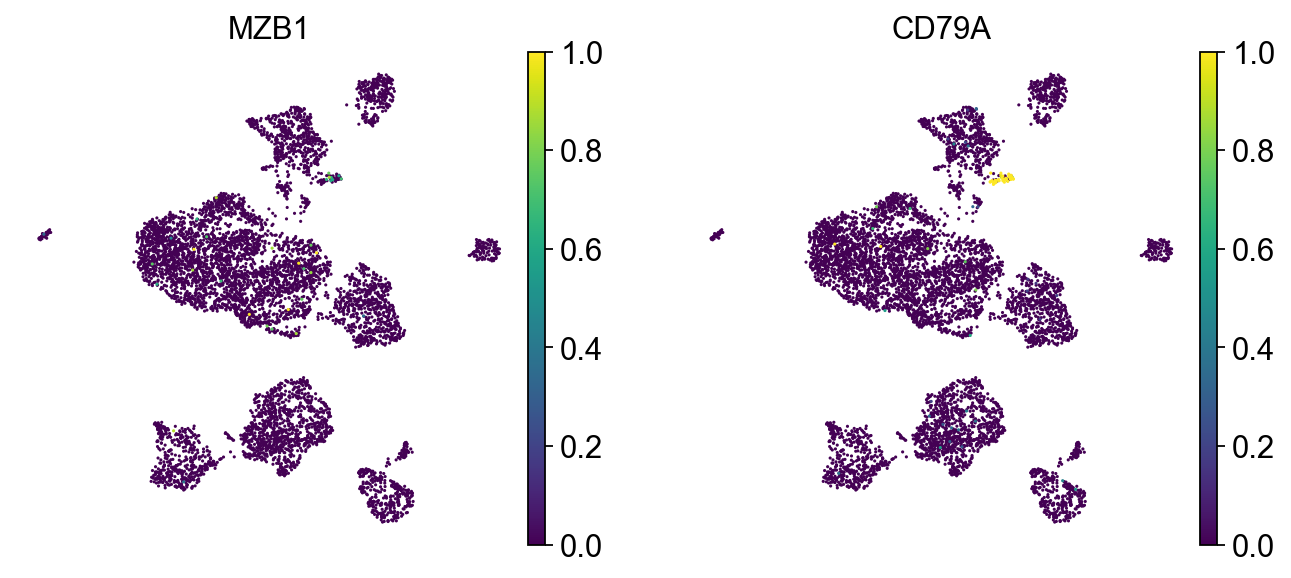

In [77]:
#plasma cell
sc.pl.umap(adata, color = ['MZB1', 'CD79A'], legend_fontsize = 'small', s = 8, vmax = 1)

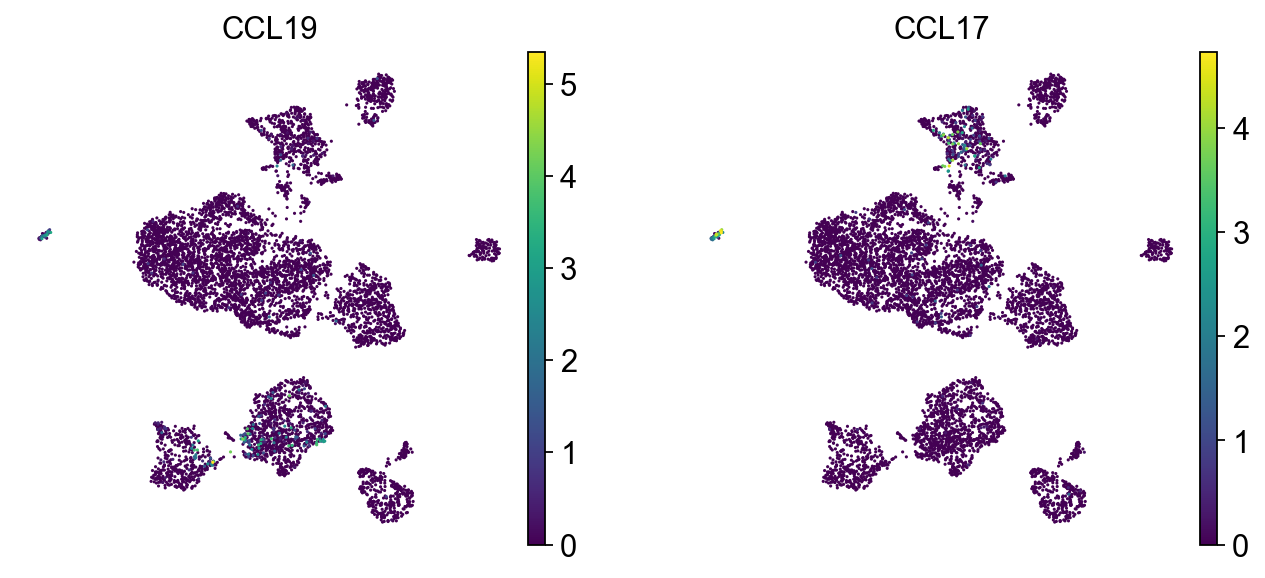

In [62]:
#macrophage: M1
sc.pl.umap(adata, color = ['CCL19', 'CCL17'], legend_fontsize = 'small', s = 8)

In [160]:
#M1
markers[(markers.names == "CCL19") | (markers.names == "CD200")  ].sort_values('logfoldchanges', ascending=False).head(10)

group  names     scores  logfoldchanges         pvals     pvals_adj
1375336    41  CCL19   5.232032        5.178681  5.623645e-06  3.158697e-05
234958      7  CD200  14.966403        4.875024  1.424301e-35  4.382405e-34
1375149    41  CD200   8.498449        4.025773  1.639855e-10  1.357292e-09
403984     12  CCL19   5.106563        3.666188  7.744051e-07  6.098144e-06
1308220    39  CD200   4.938584        3.270552  7.661558e-06  4.988417e-05
1040666    31  CCL19   2.863747        3.120044  5.138767e-03  2.116208e-02
505038     15  CCL19   3.881444        2.792456  1.449005e-04  8.816534e-04
1073805    32  CD200   4.673508        2.507448  9.780887e-06  7.687635e-05
572732     17  CCL19   2.363708        1.910697  1.928497e-02  6.950132e-02
709430     21  CCL19   1.857346        1.458353  6.518415e-02  1.835709e-01

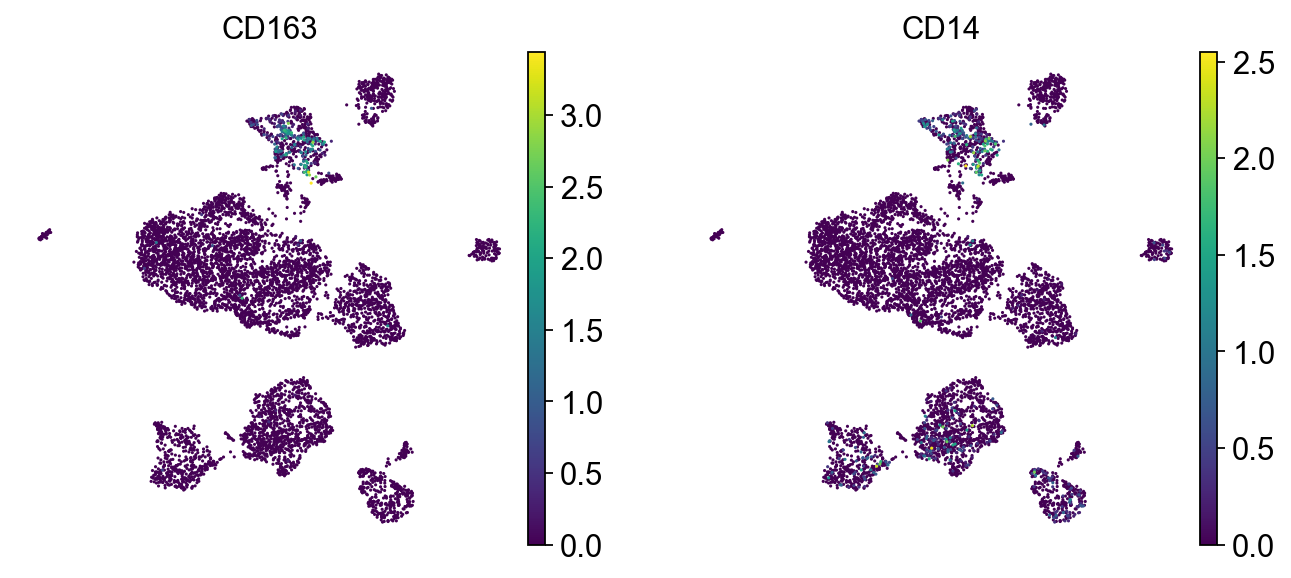

In [147]:
#macrophage
sc.pl.umap(adata, color = ['CD163', 'CD14'], legend_fontsize = 'small', s = 8)

In [163]:
markers[(markers.group == '37') & (markers.pvals_adj < 0.05)].sort_values('logfoldchanges', ascending=False).head(10)

group       names     scores  logfoldchanges         pvals  \
1241241    37     S100A12   6.242479        9.825320  3.044254e-08   
1240987    37        AQP9  10.976798        9.075627  8.682173e-17   
1241290    37     TNFSF15   5.864265        8.314881  1.409928e-07   
1240918    37        IL1B  20.326395        8.102775  6.910822e-31   
1241415    37      SMIM25   4.906434        7.989103  5.947296e-06   
1241131    37  AC245128.3   7.539505        7.814420  1.386945e-10   
1242063    37     TM4SF19   2.841039        7.765508  5.906236e-03   
1241901    37        VNN1   3.191292        7.272466  2.132751e-03   
1240960    37        EREG  12.881749        7.231938  4.857576e-20   
1241104    37     SLC11A1   7.964281        7.164835  2.320668e-11   

            pvals_adj  
1241241  1.865830e-07  
1240987  9.197180e-16  
1241290  8.137351e-07  
1240918  1.257597e-29  
1241415  2.894506e-05  
1241131  1.020521e-09  
1242063  1.825485e-02  
1241901  7.210504e-03  
1240960  5.980668e-19  
1241104  1.799135e-10

In [162]:
markers[(markers.names == 'AQP9') ].sort_values('logfoldchanges', ascending=False).head(10)

group names     scores  logfoldchanges         pvals     pvals_adj
1240987    37  AQP9  10.976798        9.075627  8.682173e-17  9.197180e-16
1510097    45  AQP9   0.912721        3.649492  3.809538e-01  6.013569e-01
471273     14  AQP9   3.424316        2.598320  7.570382e-04  2.894715e-03
975774     29  AQP9   0.206960        0.339592  8.364418e-01  1.000000e+00
314418      9  AQP9  -0.926371       -0.971712  3.551732e-01  5.376573e-01
428328     12  AQP9  -2.023198       -1.306357  4.397793e-02  1.293800e-01
658653     19  AQP9  -1.767695       -1.398264  7.864346e-02  1.894379e-01
530809     15  AQP9  -2.368999       -1.559747  1.851593e-02  6.482123e-02
1033351    30  AQP9  -2.986790       -1.797677  3.193007e-03  1.388037e-02
227637      6  AQP9  -3.132457       -2.211061  1.857034e-03  8.039398e-03

In [168]:
manual_label = {"0": "CD4+T",
"1": "CD8+T",
"2": "Treg",
"3": "dermal_fibroblast",
"4": "CD4+T",
"5": "spinous_keratinocyte",
"6": "CD8+T",
"7": "vascular_endothelium",
"8": "CD4+T",
"9": "mast_cell",
"10": "myocyte",
"11": "CD4+T",
"12": "dermal_fibroblast",
"13": "CD4+T",
"14": "macrophage",
"15": "dermal_fibroblast",
"16": "CD4+T",
"17": "myocyte",
"18": "CD4+T",
"19": "dendritic_cell",
"20": "basal_keratinocyte",
"21": "dermal_sheath",
"22": "Treg",
"23": "CD4+T",
"24": "spinous_keratinocyte",
"25": "CD4+T",
"26": "melanocyte",
"27": "HFDPC",
"28": "CD8+T",
"29": "CD4+T",
"30": "macrophage",
"31": "pericyte",
"32": "vascular_endothelium",
"33": "dermal_fibroblast",
"34": "HF_keratinocyte",
"35": "CD8+T",
"36": "dendritic_cell",
"37": "macrophage",
"38": "plasma_cell",
"39": "lymphatic_endothelium",
"40": "CD8+T",
"41": "M1_macrophage",
"42": "mast_cell",
"43": "CD4+T",
"44": "spinous_keratinocyte",
"45": "dermal_fibroblast"}

In [170]:
adata.obs['manual_label'] = adata.obs.overcluster.map(manual_label)

In [203]:
sc.settings.set_figure_params(
    dpi=180,
    facecolor="white",
    frameon=False,)

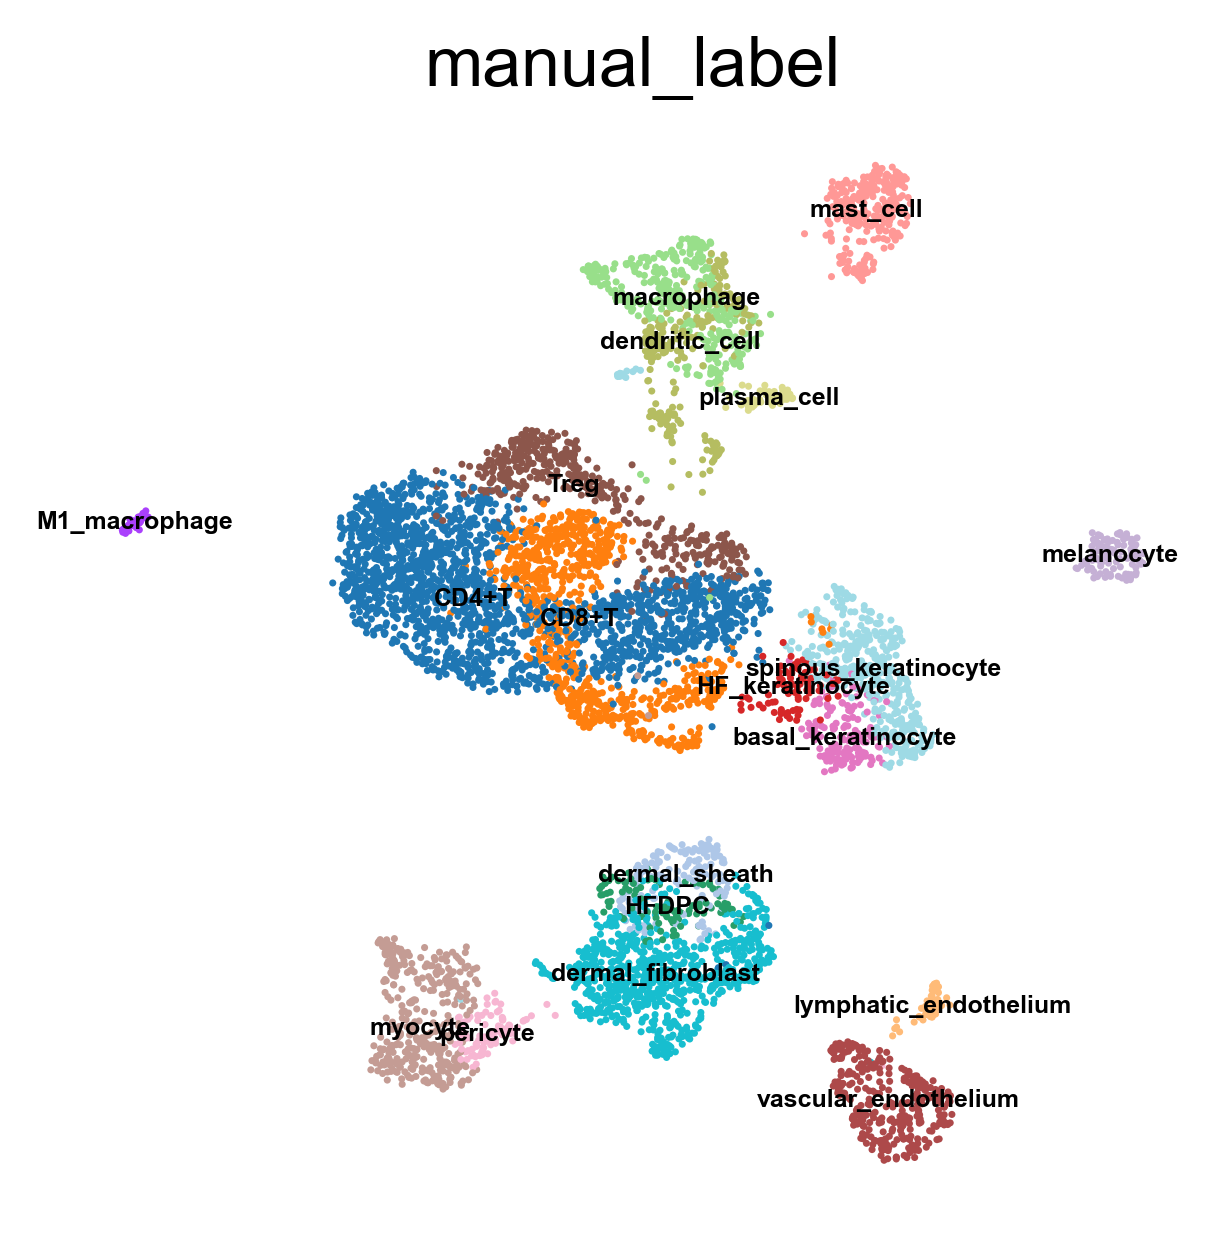

In [204]:
sc.pl.umap(adata, color = ['manual_label'], legend_fontsize = '5', s = 8, legend_loc = 'on data')
